# Prédiction du Churn – Utilisateurs Waze

📝 Introduction
Ce notebook a pour objectif de prédire le churn des utilisateurs à partir de données clients. Nous avons suivi une approche méthodique, en commençant par une analyse exploratoire des données, suivie de techniques d'équilibrage de dataset, et enfin l'application de plusieurs algorithmes de classification pour évaluer les performances.

Plan d'Analyse 🗺️

💠 1. Importer les bibliothèques nécessaires
💠 2. Chargement des données
💠 3. Exploration des données (EDA)
💠 4. Statistiques descriptives des variables
🔸 4.1 Répartition des types de variables
💠 5. Vérification et traitement des valeurs manquantes et doublons
💠 6. Visualisation des colonnes et détection des valeurs aberrantes
💠 7. Distribution de la variable cible (Churn)

⚖️ Traitement du déséquilibre de la classe
💠 8. Tentatives de rééquilibrage du dataset :
🔸 8.1 Sous-échantillonnage (undersampling)
🔸 8.2 Sur-échantillonnage (oversampling)
🔸 8.3 SMOTE (Synthetic Minority Oversampling Technique)

⚙️ Prétraitement des données
💠 9. Encodage des variables catégorielles
💠 10. Standardisation des colonnes numériques
💠 11. Analyse de la relation entre la variable cible et les autres variables

🤖 Modélisation
💠 12. Entraînement de plusieurs algorithmes de classification :
🔸 12.1 Régression Logistique
🔸 12.2 K-Nearest Neighbors (KNN)
🔸 12.3 Decision Tree
🔸 12.4 Random Forest
🔸 12.5 Gradient Boosting (XGBoost, LightGBM, etc.)
🔸 12.6 Support Vector Machine (SVM)
🔸 12.7 Naive Bayes

📊 Évaluation des modèles
💠 13. Visualisation des performances :
🔸 Matrice de confusion
🔸 Courbes ROC / AUC
🔸 Accuracy, Recall, Precision, F1-score
🔸 Comparaison des performances entre modèles

💠 14. Sauvegarde du meilleur modèle (Pickle / Joblib)M

In [ ]:
data = pd.read_csv('waze_dataset.xls')


In [131]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from collections import Counter



## Étape 1 : Chargement & Analyse Exploratoire (EDA)

#### Charger le dataset

#### Dimensions du dataset

In [294]:
print("Dimensions du dataset :", data.shape)

Dimensions du dataset : (14999, 13)


In [295]:
data.head(10)

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android
5,5,retained,113,103,279.544437,2637,0,0,901.238699,439.101397,15,11,iPhone
6,6,retained,3,2,236.725314,360,185,18,5249.172828,726.577205,28,23,iPhone
7,7,retained,39,35,176.072845,2999,0,0,7892.052468,2466.981741,22,20,iPhone
8,8,retained,57,46,183.532018,424,0,26,2651.709764,1594.342984,25,20,Android
9,9,churned,84,68,244.802115,2997,72,0,6043.460295,2341.838528,7,3,iPhone


In [296]:
data.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879
std,4329.982679,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


### les types et visualisation des valeurs

le data contient les types suivant 
 int64      8
float64    3
object     2
Name: count, dtype: int64


<Axes: ylabel='count'>

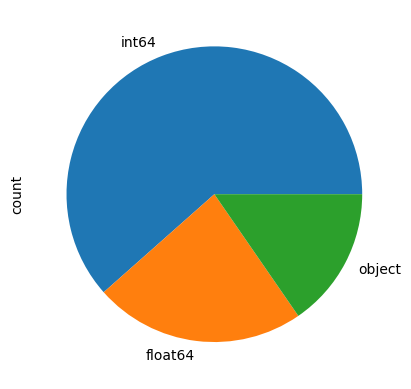

In [346]:
print(f'le data contient les types suivant \n {data.dtypes.value_counts()}')
data.dtypes.value_counts().plot.pie()

### les valeurs null et les valeur aberants

In [347]:
# Check for missing values in the DataFrame
data.isnull().sum()

ID                           0
label                      700
sessions                     0
drives                       0
total_sessions               0
n_days_after_onboarding      0
total_navigations_fav1       0
total_navigations_fav2       0
driven_km_drives             0
duration_minutes_drives      0
activity_days                0
driving_days                 0
device                       0
dtype: int64

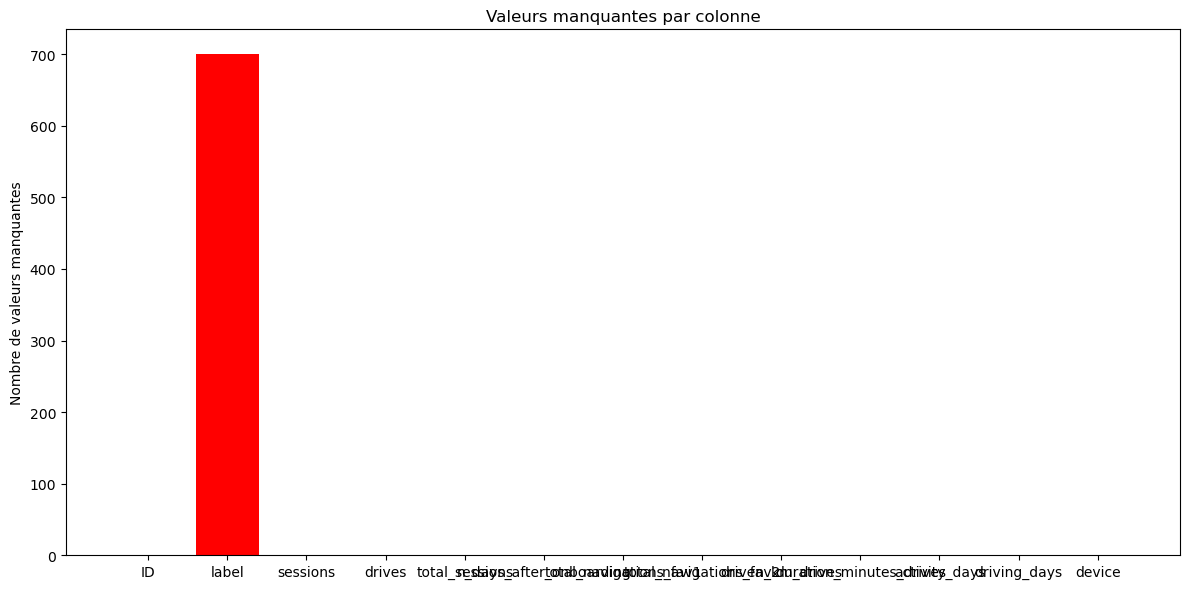

In [348]:
# Compter les valeurs manquantes
null_count = data.isnull().sum()


# Tracer le barplot
plt.figure(figsize=(12, 6))
plt.bar(null_count.index, null_count.values, color='red')
plt.ylabel("Nombre de valeurs manquantes")
plt.title("Valeurs manquantes par colonne")
plt.tight_layout()
plt.show()



### outliers

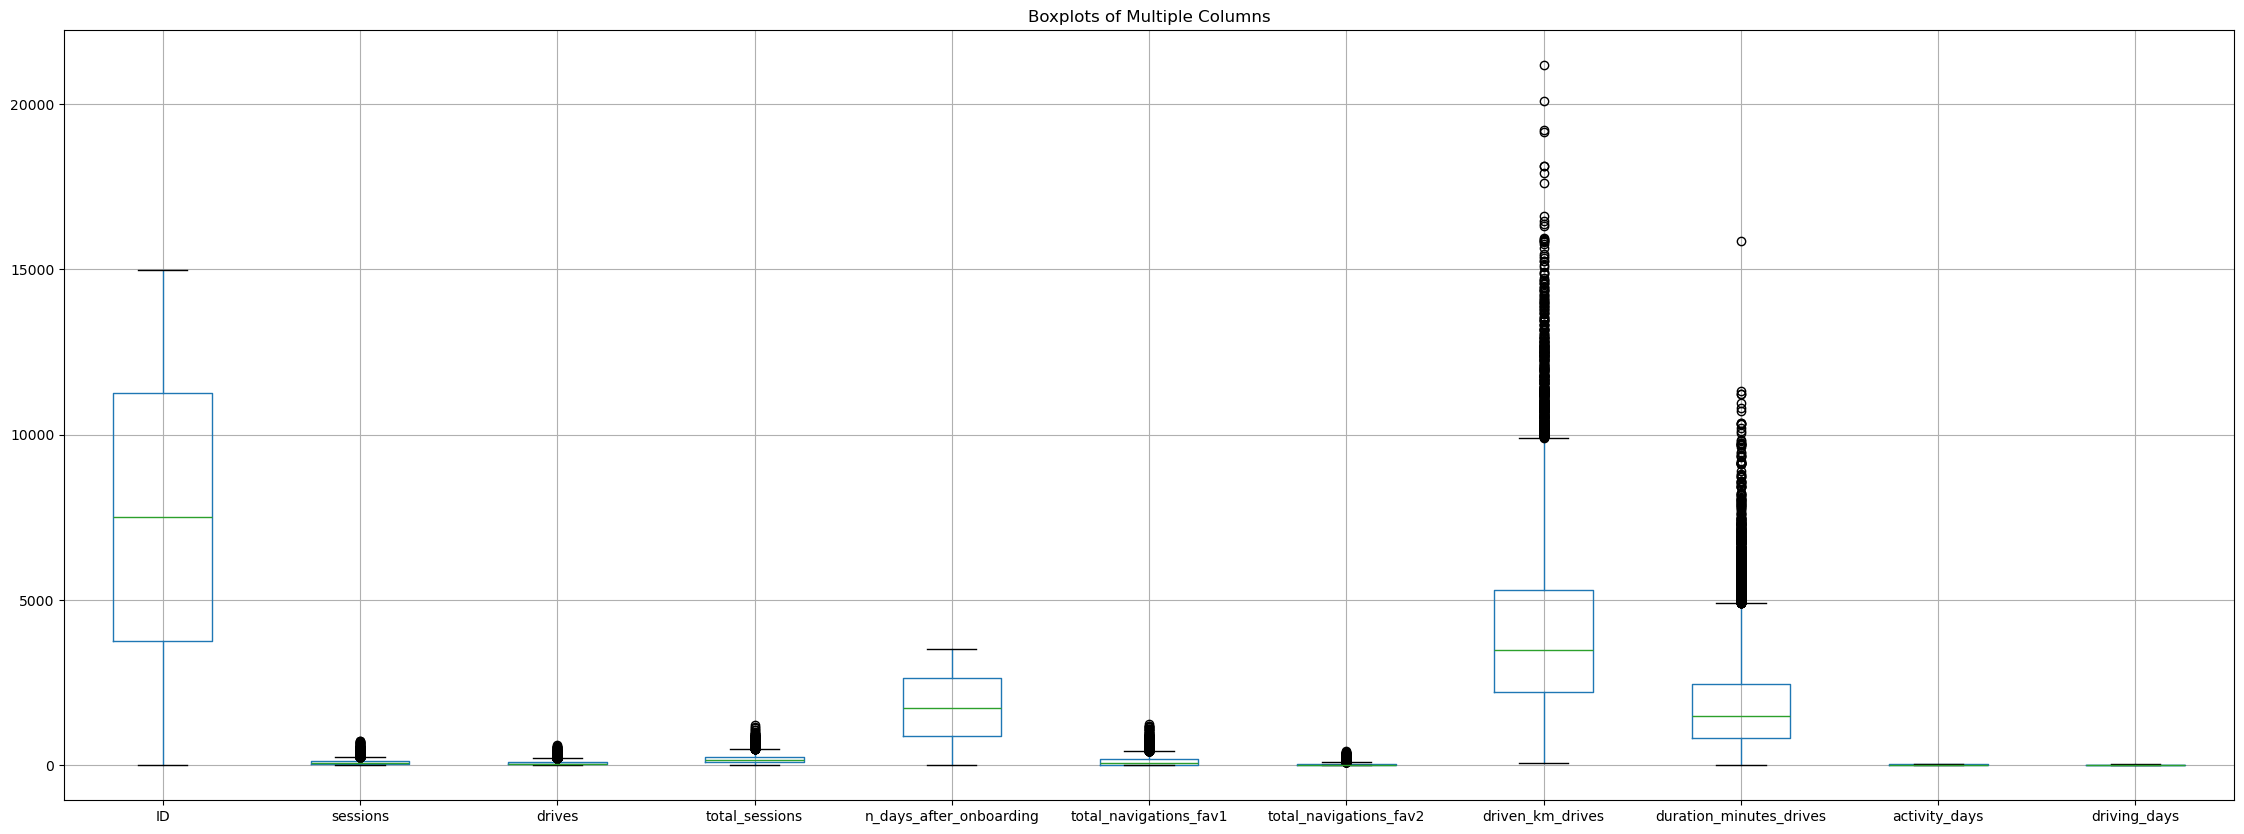

In [423]:
columns = []
for i in data.columns:
    columns.append(i)
columns.remove('label')
columns.remove('device')

data.boxplot(column=columns, figsize=(28, 10))
plt.title('Boxplots of Multiple Columns')
plt.show()

### visualisation des variables

### session

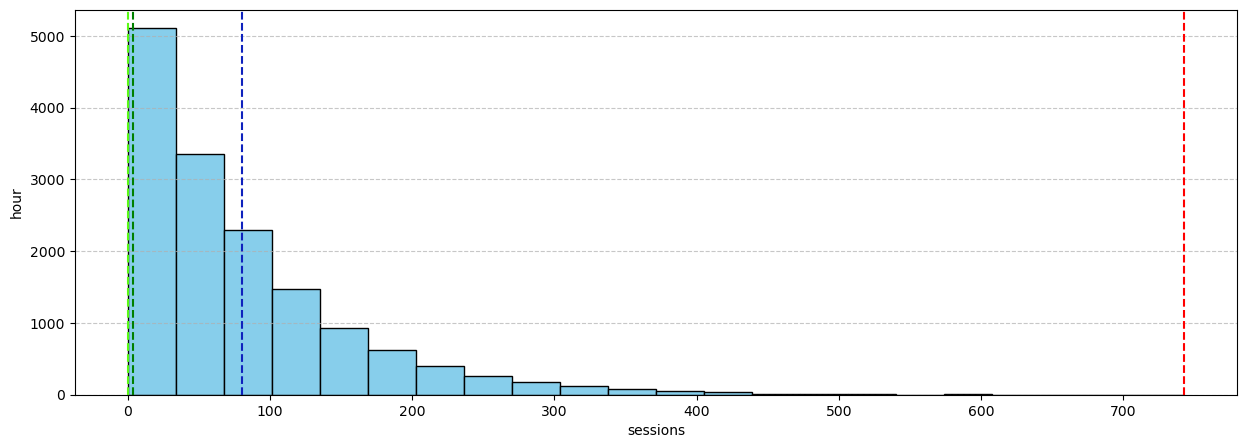

                                  -------------------------
le min est : 0
le max est : 743
le mode est : 0    4
Name: sessions, dtype: int64
le mean est : 80.633775585039



In [300]:
mean = data['sessions'].mean()
mode = data['sessions'].mode()
maxx = data['sessions'].max()
minn = data['sessions'].min()

plt.figure(figsize=(15,5))
plt.hist(data['sessions'], bins=22, color='skyblue', edgecolor='black')
plt.axvline(x=mean, color='#0f22bd', linestyle='--', label='mean') 
plt.axvline(x=mode[0], color='green', linestyle='--', label='mode') 
plt.axvline(x=maxx, color='red', linestyle='--', label='maxx') 
plt.axvline(x=minn, color='#5af915', linestyle='--', label='minn') 

plt.xlabel("sessions")
plt.ylabel("hour")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print('                                  -------------------------')
print(f'le min est : {minn}')
print(f'le max est : {maxx}')
print(f'le mode est : {mode}')
print(f'le mean est : {mean}')
print()

### drives

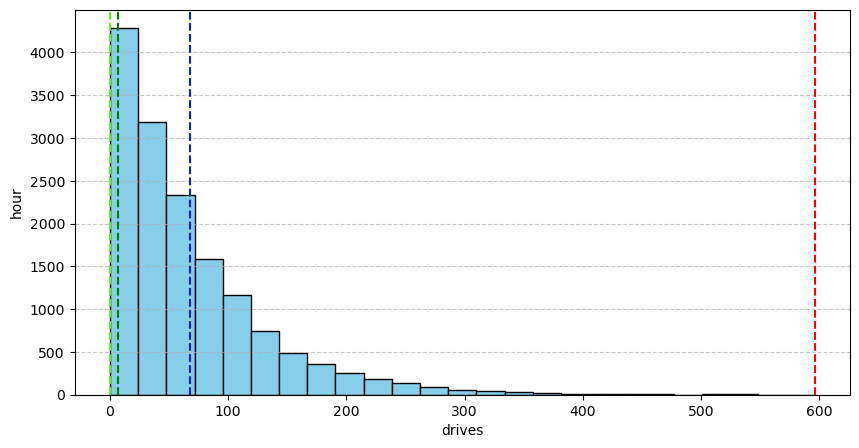

                                  -------------------------
le min est : 0
le max est : 596
le mode est : 0    7
Name: drives, dtype: int64
le mean est : 67.28115207680511



In [301]:
mean = data['drives'].mean()
mode = data['drives'].mode()
maxx = data['drives'].max()
minn = data['drives'].min()

plt.figure(figsize=(10,5))
plt.hist(data['drives'], bins=25, color='skyblue', edgecolor='black')
plt.axvline(x=mean, color='#0f22bd', linestyle='--', label='mean') 
plt.axvline(x=mode[0], color='green', linestyle='--', label='mode') 
plt.axvline(x=maxx, color='red', linestyle='--', label='maxx') 
plt.axvline(x=minn, color='#5af915', linestyle='--', label='minn') 
plt.xlabel("drives")
plt.ylabel("hour")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print('                                  -------------------------')
print(f'le min est : {minn}')
print(f'le max est : {maxx}')
print(f'le mode est : {mode}')
print(f'le mean est : {mean}')
print()

### total session

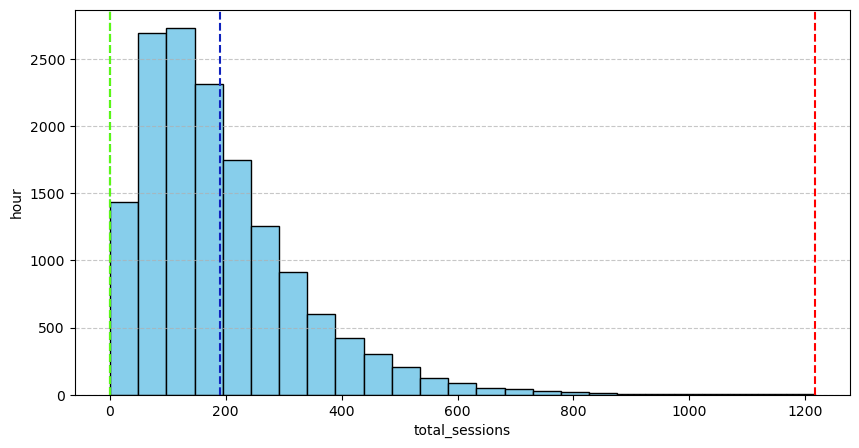

                                  -------------------------
le min est : 0.2202109438
le max est : 1216.154633
le mode est : 0           0.220211
1           0.653323
2           1.200660
3           1.362129
4           2.894852
            ...     
14994    1051.883733
14995    1076.879741
14996    1117.893821
14997    1155.993315
14998    1216.154633
Name: total_sessions, Length: 14999, dtype: float64
le mean est : 189.9644468240468



In [207]:

mean = data['total_sessions'].mean()
mode = data['total_sessions'].mode()
maxx = data['total_sessions'].max()
minn = data['total_sessions'].min()


plt.figure(figsize=(10,5))
plt.hist(data['total_sessions'], bins=25, color='skyblue', edgecolor='black')
plt.axvline(x=mean, color='#0f22bd', linestyle='--', label='mean') 
plt.axvline(x=mode[0], color='green', linestyle='--', label='mode') 
plt.axvline(x=maxx, color='red', linestyle='--', label='maxx') 
plt.axvline(x=minn, color='#5af915', linestyle='--', label='minn') 
plt.xlabel("total_sessions")
plt.ylabel("hour")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print('                                  -------------------------')
print(f'le min est : {minn}')
print(f'le max est : {maxx}')
print(f'le mode est : {mode}')
print(f'le mean est : {mean}')
print()

### n_days_after_onboarding

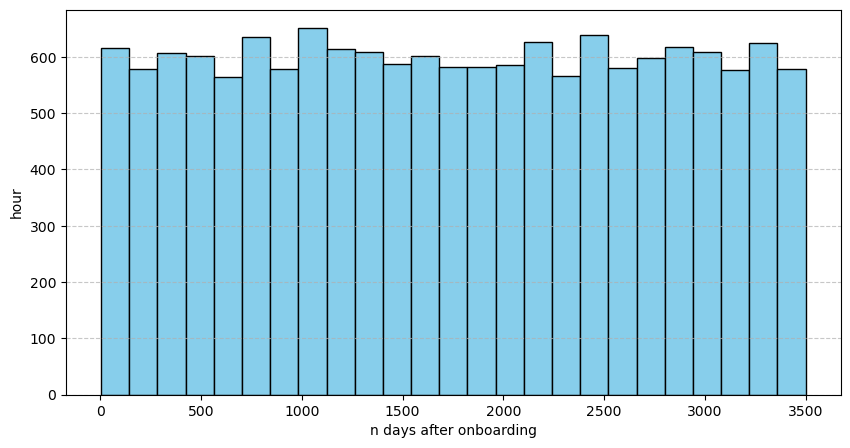

                                  -------------------------
le min est : 4
le max est : 3500
le mode est : 0      27
1     692
2    3084
3    3235
Name: n_days_after_onboarding, dtype: int64
le mean est : 1749.8377891859457



In [6]:

mean = data['n_days_after_onboarding'].mean()
mode = data['n_days_after_onboarding'].mode()
maxx = data['n_days_after_onboarding'].max()
minn = data['n_days_after_onboarding'].min()

plt.figure(figsize=(10,5))
plt.hist(data['n_days_after_onboarding'], bins=25, color='skyblue', edgecolor='black')
plt.xlabel("n days after onboarding")
plt.ylabel("hour")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print('                                  -------------------------')
print(f'le min est : {minn}')
print(f'le max est : {maxx}')
print(f'le mode est : {mode}')
print(f'le mean est : {mean}')
print()

### total_navigations_fav1

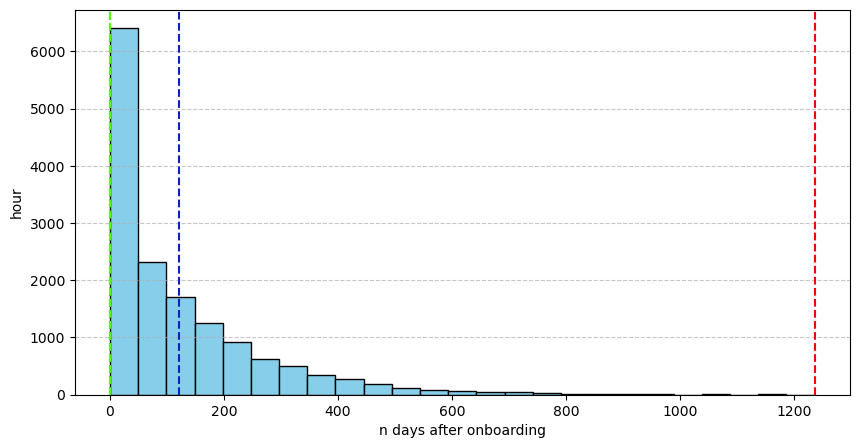

                                  -------------------------
le min est : 0
le max est : 1236
le mode est : 0    0
Name: total_navigations_fav1, dtype: int64
le mean est : 121.60597373158211



In [209]:
mean = data['total_navigations_fav1'].mean()
mode = data['total_navigations_fav1'].mode()
maxx = data['total_navigations_fav1'].max()
minn = data['total_navigations_fav1'].min()


plt.figure(figsize=(10,5))
plt.hist(data['total_navigations_fav1'], bins=25, color='skyblue', edgecolor='black')
plt.axvline(x=mean, color='#0f22bd', linestyle='--', label='mean') 
plt.axvline(x=mode[0], color='green', linestyle='--', label='mode') 
plt.axvline(x=maxx, color='red', linestyle='--', label='maxx') 
plt.axvline(x=minn, color='#5af915', linestyle='--', label='minn') 
plt.xlabel("n days after onboarding")
plt.ylabel("hour")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


print('                                  -------------------------')
print(f'le min est : {minn}')
print(f'le max est : {maxx}')
print(f'le mode est : {mode}')
print(f'le mean est : {mean}')
print()

### total_navigations_fav2

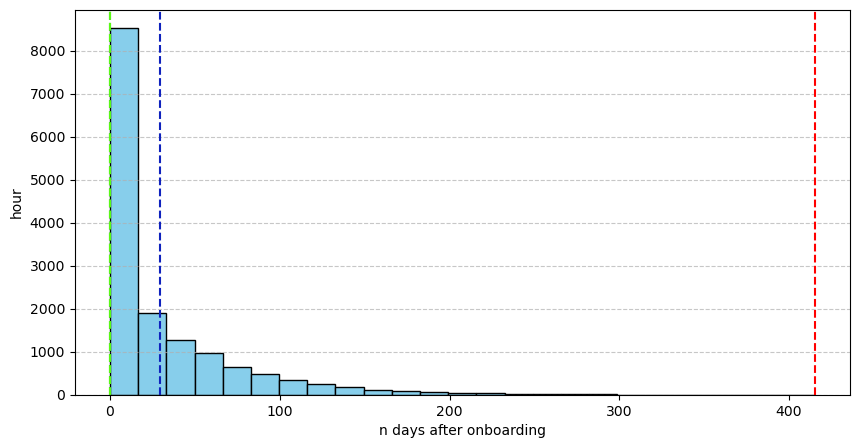

                                  -------------------------
le min est : 0
le max est : 415
le mode est : 0    0
Name: total_navigations_fav2, dtype: int64
le mean est : 29.672511500766717



In [210]:
mean = data['total_navigations_fav2'].mean()
mode = data['total_navigations_fav2'].mode()
maxx = data['total_navigations_fav2'].max()
minn = data['total_navigations_fav2'].min()

plt.figure(figsize=(10,5))
plt.hist(data['total_navigations_fav2'], bins=25, color='skyblue', edgecolor='black')
plt.axvline(x=mean, color='#0f22bd', linestyle='--', label='mean') 
plt.axvline(x=mode[0], color='green', linestyle='--', label='mode') 
plt.axvline(x=maxx, color='red', linestyle='--', label='maxx') 
plt.axvline(x=minn, color='#5af915', linestyle='--', label='minn')
plt.xlabel("n days after onboarding")
plt.ylabel("hour")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print('                                  -------------------------')
print(f'le min est : {minn}')
print(f'le max est : {maxx}')
print(f'le mode est : {mode}')
print(f'le mean est : {mean}')
print()

### driven_km_drives

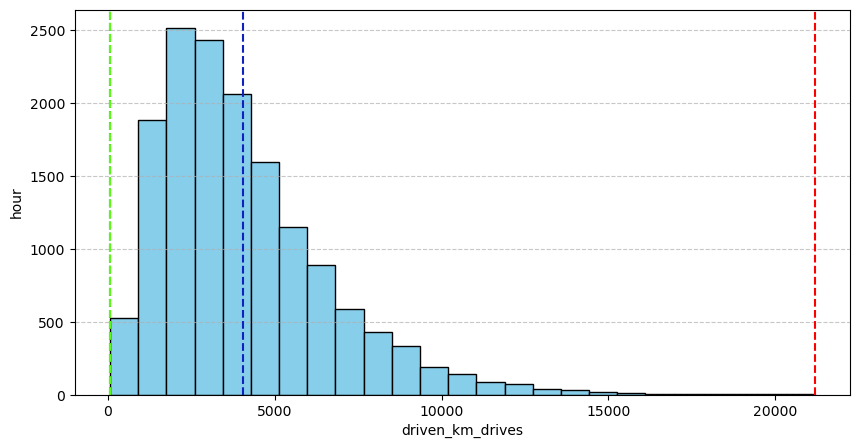

                                  -------------------------
le min est : 60.44125046
le max est : 21183.40189
le mode est : 0           60.441250
1          159.444055
2          167.505320
3          178.232313
4          179.561996
             ...     
14994    18129.927710
14995    19157.588380
14996    19214.475110
14997    20108.364120
14998    21183.401890
Name: driven_km_drives, Length: 14999, dtype: float64
le mean est : 4039.3409208164917



In [211]:
mean = data['driven_km_drives'].mean()
mode = data['driven_km_drives'].mode()
maxx = data['driven_km_drives'].max()
minn = data['driven_km_drives'].min()

plt.figure(figsize=(10,5))
plt.hist(data['driven_km_drives'], bins=25, color='skyblue', edgecolor='black')
plt.axvline(x=mean, color='#0f22bd', linestyle='--', label='mean') 
plt.axvline(x=mode[0], color='green', linestyle='--', label='mode') 
plt.axvline(x=maxx, color='red', linestyle='--', label='maxx') 
plt.axvline(x=minn, color='#5af915', linestyle='--', label='minn')
plt.xlabel("driven_km_drives")
plt.ylabel("hour")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


print('                                  -------------------------')
print(f'le min est : {minn}')
print(f'le max est : {maxx}')
print(f'le mode est : {mode}')
print(f'le mean est : {mean}')
print()

### duration_minutes_drives

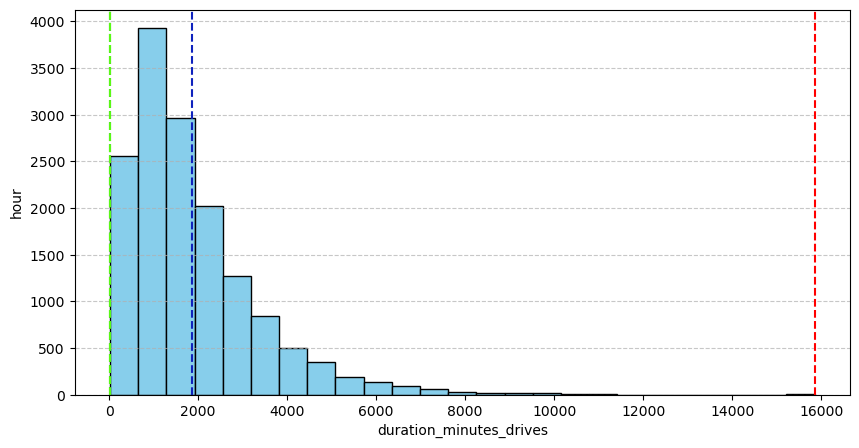

                                  -------------------------
le min est : 18.28208247
le max est : 15851.72716
le mode est : 0           18.282082
1           23.022685
2           23.222707
3           24.466717
4           29.498317
             ...     
14994    10972.762170
14995    11228.804540
14996    11230.893320
14997    11328.678780
14998    15851.727160
Name: duration_minutes_drives, Length: 14999, dtype: float64
le mean est : 1860.976012129396



In [212]:
mean = data['duration_minutes_drives'].mean()
mode = data['duration_minutes_drives'].mode()
maxx = data['duration_minutes_drives'].max()
minn = data['duration_minutes_drives'].min()

plt.figure(figsize=(10,5))
plt.hist(data['duration_minutes_drives'], bins=25, color='skyblue', edgecolor='black')
plt.axvline(x=mean, color='#0f22bd', linestyle='--', label='mean') 
plt.axvline(x=mode[0], color='green', linestyle='--', label='mode') 
plt.axvline(x=maxx, color='red', linestyle='--', label='maxx') 
plt.axvline(x=minn, color='#5af915', linestyle='--', label='minn')
plt.xlabel("duration_minutes_drives")
plt.ylabel("hour")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


print('                                  -------------------------')
print(f'le min est : {minn}')
print(f'le max est : {maxx}')
print(f'le mode est : {mode}')
print(f'le mean est : {mean}')
print()

### activity_days

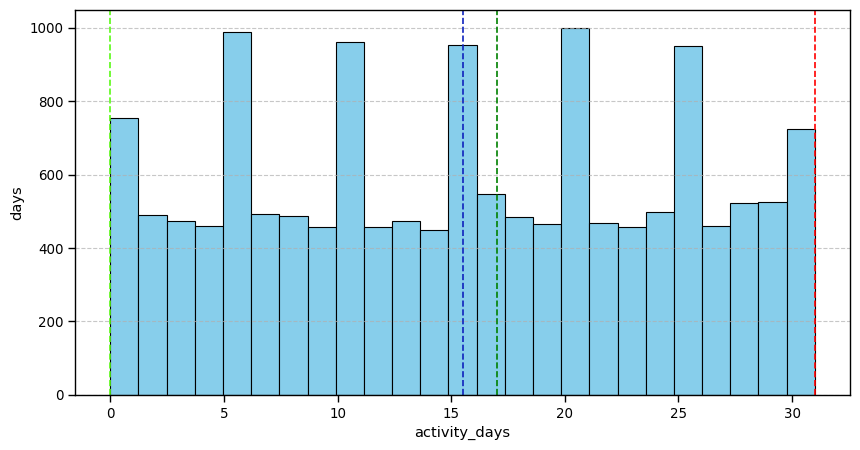

                                  -------------------------
le min est : 0
le max est : 31
le mode est : 0    17
Name: activity_days, dtype: int64
le mean est : 15.537102473498233



In [31]:
mean = data['activity_days'].mean()
mode = data['activity_days'].mode()
maxx = data['activity_days'].max()
minn = data['activity_days'].min()

plt.figure(figsize=(10,5))
plt.hist(data['activity_days'], bins=25, color='skyblue', edgecolor='black')
plt.axvline(x=mean, color='#0f22bd', linestyle='--', label='mean') 
plt.axvline(x=mode[0], color='green', linestyle='--', label='mode') 
plt.axvline(x=maxx, color='red', linestyle='--', label='maxx') 
plt.axvline(x=minn, color='#5af915', linestyle='--', label='minn')
plt.xlabel("activity_days")
plt.ylabel("days")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


print('                                  -------------------------')
print(f'le min est : {minn}')
print(f'le max est : {maxx}')
print(f'le mode est : {mode}')
print(f'le mean est : {mean}')
print()

### driving_days 

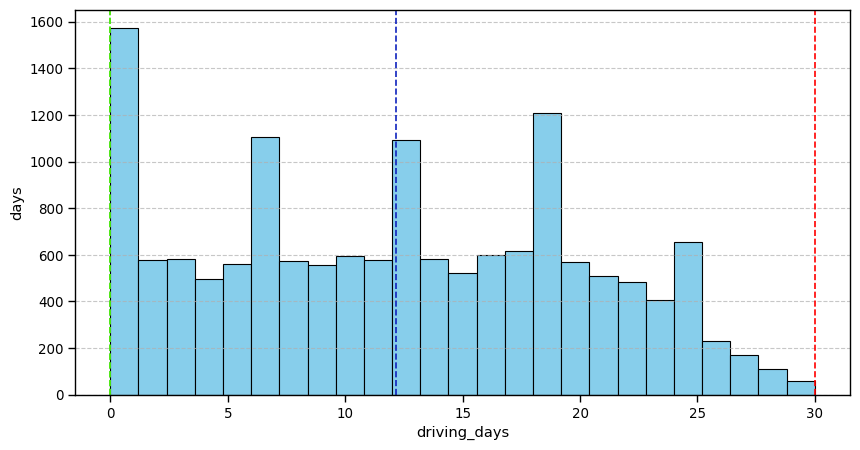

                                  -------------------------
le min est : 0
le max est : 30
le mode est : 0    0
Name: driving_days, dtype: int64
le mean est : 12.179878658577238



In [32]:
mean = data['driving_days'].mean()
mode = data['driving_days'].mode()
maxx = data['driving_days'].max()
minn = data['driving_days'].min() 

plt.figure(figsize=(10,5))
plt.hist(data['driving_days'], bins=25, color='skyblue', edgecolor='black')
plt.axvline(x=mean, color='#0f22bd', linestyle='--', label='mean') 
plt.axvline(x=mode[0], color='green', linestyle='--', label='mode') 
plt.axvline(x=maxx, color='red', linestyle='--', label='maxx') 
plt.axvline(x=minn, color='#5af915', linestyle='--', label='minn')
plt.xlabel("driving_days")
plt.ylabel("days")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


print('                                  -------------------------')
print(f'le min est : {minn}')
print(f'le max est : {maxx}')
print(f'le mode est : {mode}')
print(f'le mean est : {mean}')
print()

### device

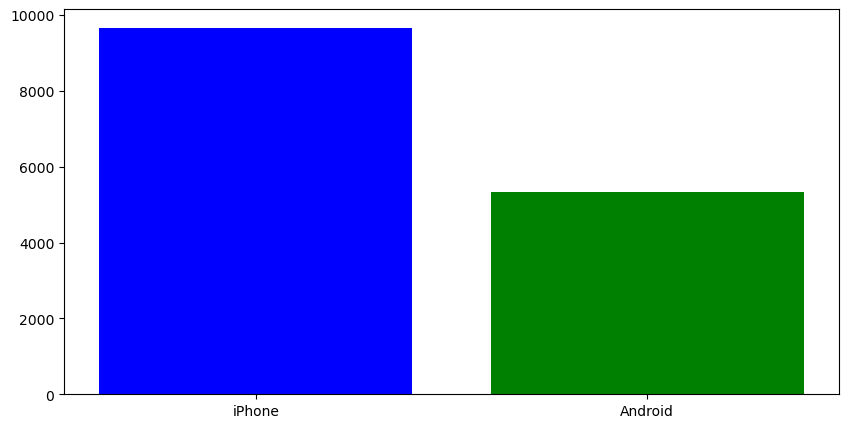

In [215]:
device_count = data['device'].value_counts()

plt.figure(figsize=(10,5))
plt.bar(device_count.index,device_count.values,color=['blue','green'])
plt.show()



### test de déséquilibre des classes 

C:\Users\info\AppData\Local\Temp\ipykernel_18812\4120414563.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=data, palette='Set2')


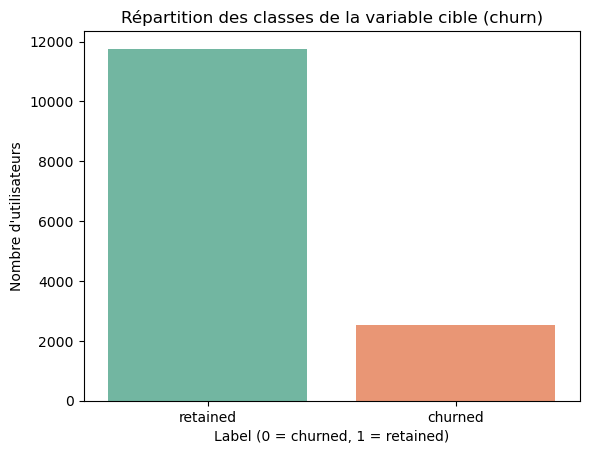

In [216]:
# Graphe en barres
sns.countplot(x='label', data=data, palette='Set2')

# Titre et labels
plt.title("Répartition des classes de la variable cible (churn)")
plt.xlabel("Label (0 = churned, 1 = retained)")
plt.ylabel("Nombre d'utilisateurs")

# Affichage
plt.show()

([<matplotlib.patches.Wedge at 0x1ec153a9250>,
 [Text(-0.9396087527231352, 0.5719575087417548, '82.59'),
  Text(0.939608752723135, -0.5719575087417549, '17.41')])

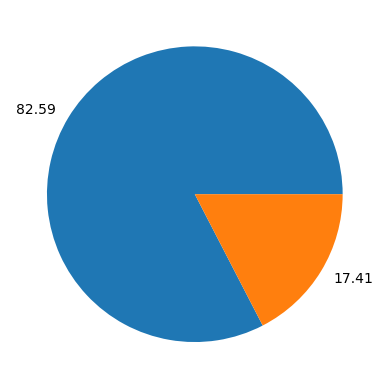

In [217]:
target = y_train.copy()
value_count = target.value_counts()


percentages = [round((value_count[1]*100)/target.shape[0],2),round((value_count[0]*100)/target.shape[0],2)]

plt.pie(value_count,labels=percentages)

In [ ]:
### variable tatrget et device 

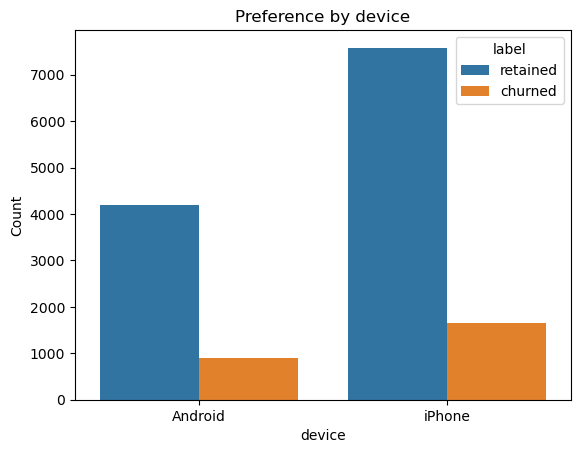

In [12]:
var = data[['label','device']]
sns.countplot(data=var, x='device', hue='label')

plt.title("Preference by device")
plt.ylabel("Count")
plt.show()

C:\Users\info\AppData\Local\Temp\ipykernel_17916\535974767.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(data.sessions[(data["label"] == 'churned') ],
C:\Users\info\AppData\Local\Temp\ipykernel_17916\535974767.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(data.sessions[(data["label"] == 'retained') ],


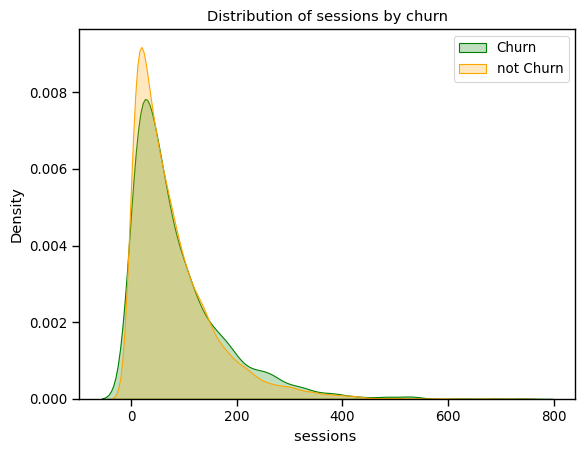

In [22]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(data.sessions[(data["label"] == 'churned') ],
                color="green", shade = True);
ax = sns.kdeplot(data.sessions[(data["label"] == 'retained') ],
                ax =ax, color="orange", shade= True);
ax.legend(["Churn","not Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('sessions ');
ax.set_title('Distribution of sessions by churn');
plt.show()


C:\Users\info\AppData\Local\Temp\ipykernel_17916\2751783006.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(data.drives[(data["label"] == 'churned') ],
C:\Users\info\AppData\Local\Temp\ipykernel_17916\2751783006.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(data.drives[(data["label"] == 'retained') ],


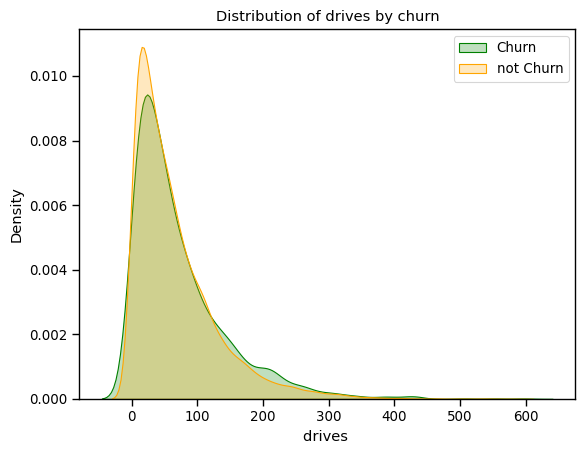

In [23]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(data.drives[(data["label"] == 'churned') ],
                color="green", shade = True);
ax = sns.kdeplot(data.drives[(data["label"] == 'retained') ],
                ax =ax, color="orange", shade= True);
ax.legend(["Churn","not Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('drives ');
ax.set_title('Distribution of drives by churn');
plt.show()

C:\Users\info\AppData\Local\Temp\ipykernel_17916\2220700580.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(data.total_sessions[(data["label"] == 'churned') ],
C:\Users\info\AppData\Local\Temp\ipykernel_17916\2220700580.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(data.total_sessions[(data["label"] == 'retained') ],


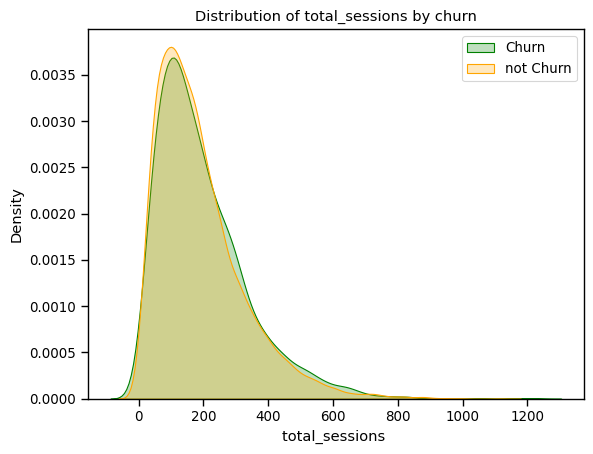

In [24]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(data.total_sessions[(data["label"] == 'churned') ],
                color="green", shade = True);
ax = sns.kdeplot(data.total_sessions[(data["label"] == 'retained') ],
                ax =ax, color="orange", shade= True);
ax.legend(["Churn","not Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('total_sessions ');
ax.set_title('Distribution of total_sessions by churn');
plt.show()

C:\Users\info\AppData\Local\Temp\ipykernel_17916\1098583309.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(data.n_days_after_onboarding[(data["label"] == 'churned') ],
C:\Users\info\AppData\Local\Temp\ipykernel_17916\1098583309.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(data.n_days_after_onboarding[(data["label"] == 'retained') ],


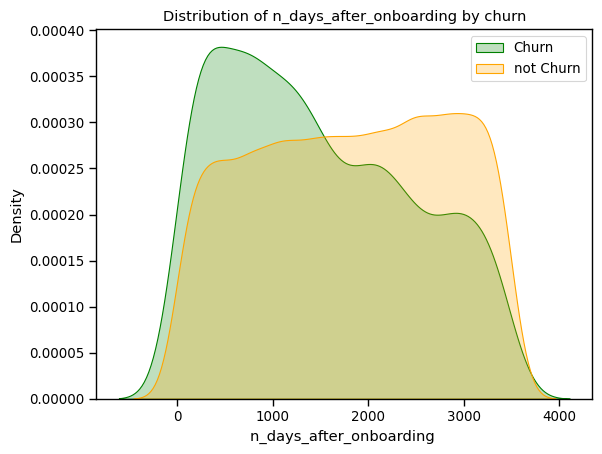

In [25]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(data.n_days_after_onboarding[(data["label"] == 'churned') ],
                color="green", shade = True);
ax = sns.kdeplot(data.n_days_after_onboarding[(data["label"] == 'retained') ],
                ax =ax, color="orange", shade= True);
ax.legend(["Churn","not Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('n_days_after_onboarding ');
ax.set_title('Distribution of n_days_after_onboarding by churn');
plt.show()

C:\Users\info\AppData\Local\Temp\ipykernel_17916\3613397008.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(data.total_navigations_fav1[(data["label"] == 'churned') ],
C:\Users\info\AppData\Local\Temp\ipykernel_17916\3613397008.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(data.total_navigations_fav1[(data["label"] == 'retained') ],


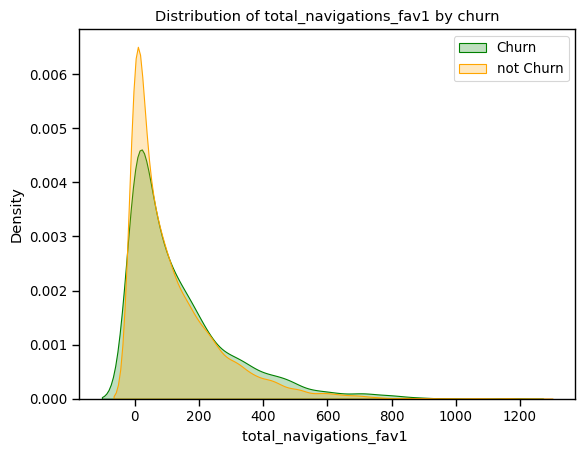

In [26]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(data.total_navigations_fav1[(data["label"] == 'churned') ],
                color="green", shade = True);
ax = sns.kdeplot(data.total_navigations_fav1[(data["label"] == 'retained') ],
                ax =ax, color="orange", shade= True);
ax.legend(["Churn","not Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('total_navigations_fav1 ');
ax.set_title('Distribution of total_navigations_fav1 by churn');
plt.show()

In [ ]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(data.total_navigations_fav2[(data["label"] == 'churned') ],
                color="green", shade = True);
ax = sns.kdeplot(data.total_navigations_fav2[(data["label"] == 'retained') ],
                ax =ax, color="orange", shade= True);
ax.legend(["Churn","not Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('total_navigations_fav2 ');
ax.set_title('Distribution of total_navigations_fav2 by churn');
plt.show()

C:\Users\info\AppData\Local\Temp\ipykernel_17916\4258644209.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(data.driven_km_drives[(data["label"] == 'churned') ],
C:\Users\info\AppData\Local\Temp\ipykernel_17916\4258644209.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(data.driven_km_drives	[(data["label"] == 'retained') ],
C:\Users\info\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


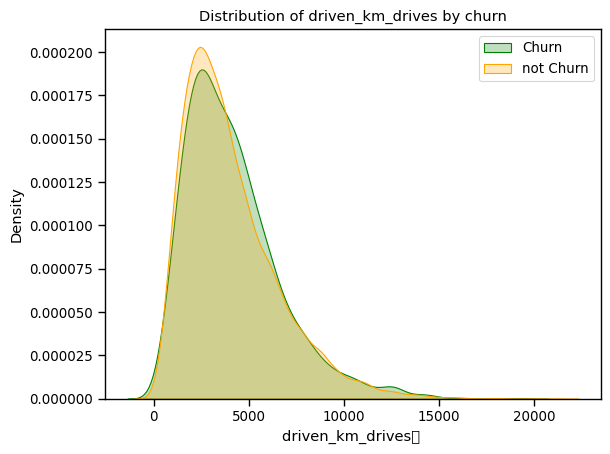

In [27]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(data.driven_km_drives[(data["label"] == 'churned') ],
                color="green", shade = True);
ax = sns.kdeplot(data.driven_km_drives	[(data["label"] == 'retained') ],
                ax =ax, color="orange", shade= True);
ax.legend(["Churn","not Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('driven_km_drives');
ax.set_title('Distribution of driven_km_drives by churn');
plt.show()

C:\Users\info\AppData\Local\Temp\ipykernel_17916\3095036987.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(data.duration_minutes_drives[(data["label"] == 'churned') ],
C:\Users\info\AppData\Local\Temp\ipykernel_17916\3095036987.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(data.duration_minutes_drives[(data["label"] == 'retained') ],


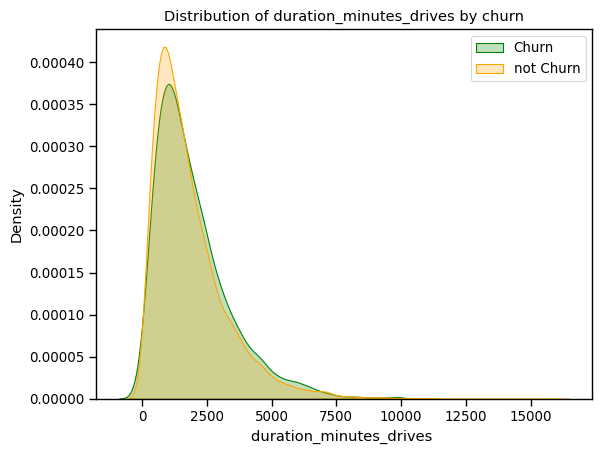

In [28]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(data.duration_minutes_drives[(data["label"] == 'churned') ],
                color="green", shade = True);
ax = sns.kdeplot(data.duration_minutes_drives[(data["label"] == 'retained') ],
                ax =ax, color="orange", shade= True);
ax.legend(["Churn","not Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('duration_minutes_drives ');
ax.set_title('Distribution of duration_minutes_drives by churn');
plt.show()

C:\Users\info\AppData\Local\Temp\ipykernel_17916\3785544551.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(data.activity_days[(data["label"] == 'churned') ],
C:\Users\info\AppData\Local\Temp\ipykernel_17916\3785544551.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(data.activity_days[(data["label"] == 'retained') ],


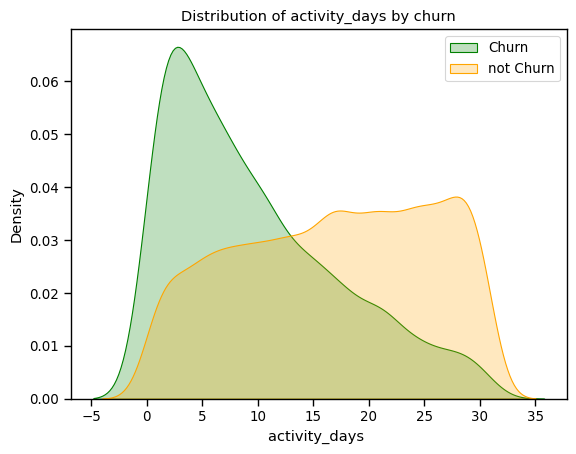

In [29]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(data.activity_days[(data["label"] == 'churned') ],
                color="green", shade = True);
ax = sns.kdeplot(data.activity_days[(data["label"] == 'retained') ],
                ax =ax, color="orange", shade= True);
ax.legend(["Churn","not Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('activity_days ');
ax.set_title('Distribution of activity_days by churn');
plt.show()

C:\Users\info\AppData\Local\Temp\ipykernel_17916\1373083264.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(data.driving_days[(data["label"] == 'churned') ],
C:\Users\info\AppData\Local\Temp\ipykernel_17916\1373083264.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(data.driving_days[(data["label"] == 'retained') ],


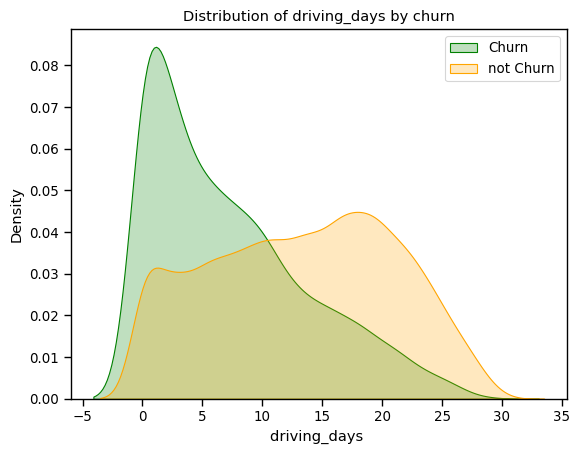

In [30]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(data.driving_days[(data["label"] == 'churned') ],
                color="green", shade = True);
ax = sns.kdeplot(data.driving_days[(data["label"] == 'retained') ],
                ax =ax, color="orange", shade= True);
ax.legend(["Churn","not Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('driving_days ');
ax.set_title('Distribution of driving_days by churn');
plt.show()

## Étape 2 : Prétraitement des Données

### les valeur null 

In [3]:
data 

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,14994,retained,60,55,207.875622,140,317,0,2890.496901,2186.155708,25,17,iPhone
14995,14995,retained,42,35,187.670313,2505,15,10,4062.575194,1208.583193,25,20,Android
14996,14996,retained,273,219,422.017241,1873,17,0,3097.825028,1031.278706,18,17,iPhone
14997,14997,churned,149,120,180.524184,3150,45,0,4051.758549,254.187763,6,6,iPhone


In [64]:
### suprissmer les valeur null et coupier pour laprediction 

In [133]:
#splitting data
n_predict = (data.loc[data['label'].isnull()]).copy()
data = data.dropna()
print(f"null data shape : {n_predict.shape}")
print(f'data shape : {data.shape}')

null data shape : (700, 13)
data shape : (14299, 13)


### separer les donner 

In [134]:
##separer les donnees
from sklearn.model_selection import train_test_split

x = data.drop(columns=['label']) 
y = data['label'] 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify=y)#stratify
data = x_train.copy()

In [135]:
x_test

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
5925,5925,55,45,154.510682,39,1104,45,3560.949667,1274.460814,20,12,iPhone
1186,1186,22,17,116.987715,1696,15,29,3144.781968,1009.047128,22,19,iPhone
9269,9269,94,76,112.115393,1733,50,21,970.565848,772.166280,28,27,iPhone
8416,8416,105,93,115.527674,713,318,13,3488.105477,2388.382597,12,12,iPhone
12942,12942,167,136,223.555452,2374,229,15,2486.152546,1519.631290,19,18,iPhone
...,...,...,...,...,...,...,...,...,...,...,...,...
5650,5650,49,40,82.540279,1836,194,9,3901.456455,2829.737112,10,8,iPhone
1053,1053,19,15,249.581039,2177,0,81,3104.478634,507.388760,7,1,iPhone
6269,6269,124,100,298.074205,698,37,51,8685.643516,801.462346,17,17,iPhone
8945,8945,11,11,81.797344,3069,0,62,5169.671245,2498.356321,18,15,iPhone


### encodage des donner

In [136]:
# Remplacement des valeurs pour 'device'
data['device'] = data['device'].map({'iPhone': 0, 'Android': 1})


y_train = y_train.map({'retained': 1, 'churned': 0})
data


,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
1096,1096,13,13,237.561772,997,216,45,3194.222587,2612.093196,28,18,0
1369,1369,13,11,49.389484,1680,439,5,3328.495156,1845.400612,4,3,0
8560,8560,15,15,78.528902,3056,256,13,5309.711961,293.449928,29,25,1
8597,8597,18,14,60.701497,1897,170,0,3414.279152,1408.089196,26,22,1
5677,5677,24,21,97.335112,1847,41,14,3318.459487,1788.450512,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6176,6176,125,102,610.060341,2396,92,35,7730.115672,2164.061227,18,12,1
4399,4399,7,7,30.435640,94,0,15,1799.341831,792.793577,1,0,1
8811,8811,46,45,209.046985,3449,25,1,3523.790360,927.692919,8,8,0
1821,1821,86,69,332.759634,1910,0,24,5738.296812,662.602634,9,6,0


<Axes: ylabel='count'>

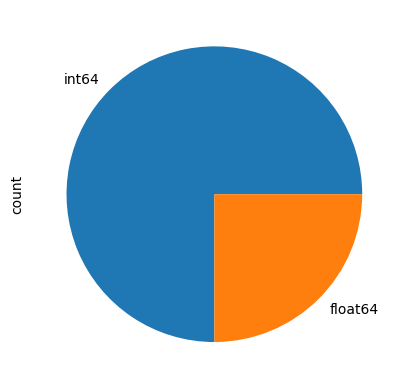

In [137]:
data.dtypes.value_counts().plot.pie()

### balancer dataset

In [138]:
#cree des copy de dataset pour tester diferente methodes de balancer le dataset
data_smote,y_smote = data.copy(),y_train.copy()
data_random_sample,y_random_sample = data.copy(),y_train.copy()
data_ADASYN ,y_ADASYN= data.copy(),y_train.copy()

#### data (with smote oversampling)

In [139]:
print("data shape before oversimpling: ",data.shape)
# SMOTE
smote = SMOTE(random_state=42)
data_smote,y_smote= smote.fit_resample(data_smote,y_smote)
print("Resampled class counts:", y_smote.value_counts())
print("data shape after oversimpling: ",data_smote.shape)

data shape before oversimpling:  (11439, 12)
Resampled class counts: label
1    9410
0    9410
Name: count, dtype: int64
data shape after oversimpling:  (18820, 12)


#### data (with ADASYN)

In [140]:
from imblearn.over_sampling import ADASYN

print("data shape before oversimpling: ",data.shape)

# Perform random sampling
adasyn = ADASYN(random_state=42)
data_ADASYN,y_ADASYN = adasyn.fit_resample(data, y_train)

print("Resampled class counts:", y_ADASYN.value_counts())
print("data shape after oversimpling: ",data_ADASYN.shape)

data shape before oversimpling:  (11439, 12)
Resampled class counts: label
0    10187
1     9410
Name: count, dtype: int64
data shape after oversimpling:  (19597, 12)


#### data balance (with random oversampling)

In [141]:
from imblearn.over_sampling import RandomOverSampler

print("data shape before oversimpling: ",data.shape)

# Perform random oversampling
ros = RandomOverSampler(random_state=0)
data_random_sample, y_random_sample = ros.fit_resample(data, y_train)

print("Resampled class counts:", y_random_sample.value_counts())
print("data shape after oversimpling: ",data_random_sample.shape)

data shape before oversimpling:  (11439, 12)
Resampled class counts: label
1    9410
0    9410
Name: count, dtype: int64
data shape after oversimpling:  (18820, 12)


### deleting ouliers

## feature engening



### add the columns fav1 and fav2 taughoder

#### inbalanced data

In [142]:
data['total_navigations_fav1_fav2'] = data['total_navigations_fav1'] + data['total_navigations_fav2']
data = data.drop(columns=['total_navigations_fav1','total_navigations_fav2'])

#### smote 

In [143]:
data_smote['total_navigations_fav1_fav2'] = data_smote['total_navigations_fav1'] + data_smote['total_navigations_fav2']
data_smote = data_smote.drop(columns=['total_navigations_fav1','total_navigations_fav2'])

#### ADASYN

In [144]:
data_ADASYN['total_navigations_fav1_fav2'] = data_ADASYN['total_navigations_fav1'] + data_ADASYN['total_navigations_fav2']
data_ADASYN = data_ADASYN.drop(columns=['total_navigations_fav1','total_navigations_fav2'])

#### random sample

In [145]:
data_random_sample['total_navigations_fav1_fav2'] = data_random_sample['total_navigations_fav1'] + data_random_sample['total_navigations_fav2']
data_random_sample = data_random_sample.drop(columns=['total_navigations_fav1','total_navigations_fav2'])

### eda

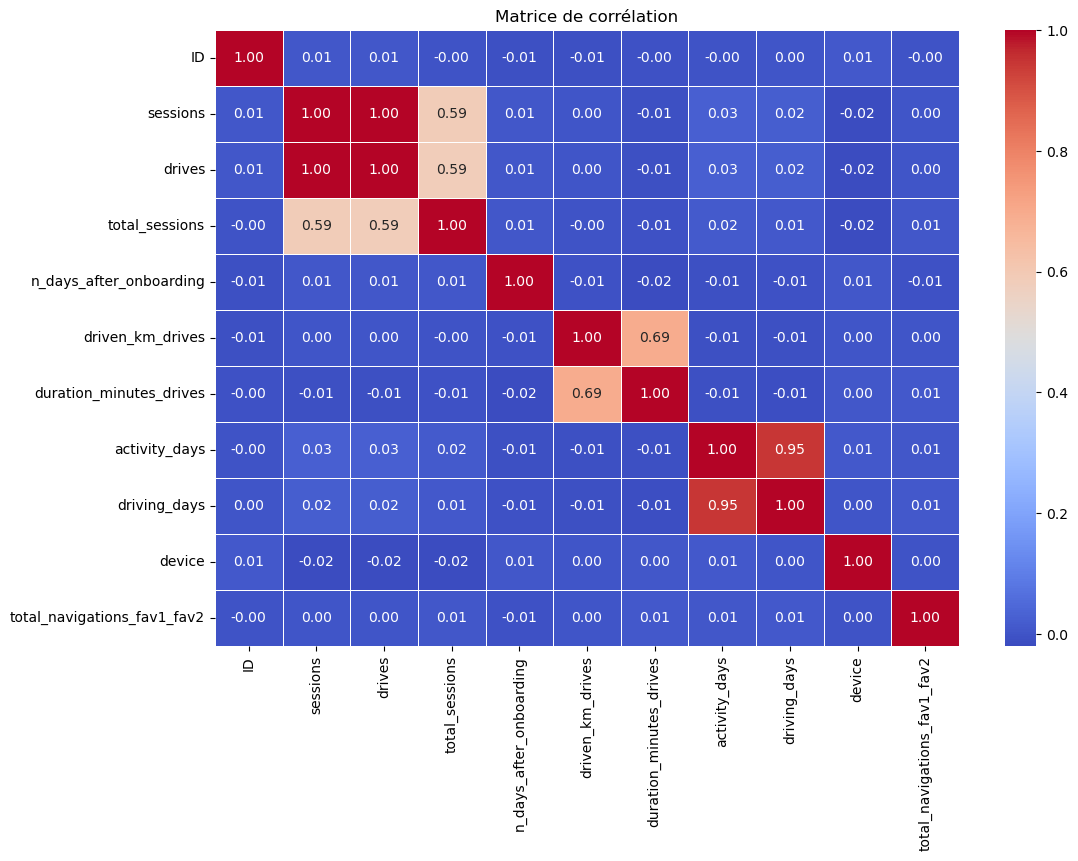

In [146]:
# Calculer la matrice de corrélation
correlation_matrix = data.corr()
# Visualisation avec une heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matrice de corrélation")
plt.show()


### merge column above 0.90 

#### smote

In [147]:
data_smote_90 = data_smote.copy()

X1 = data_smote_90[['drives', 'sessions']].values
pca1_smote_90 = PCA(n_components=1)  
X_pca1 = pca1_smote_90.fit_transform(X1)
data_smote_90['drives_sessions'] = X_pca1


X2 = data_smote[['driving_days', 'activity_days']].values
pca2_smote_90 = PCA(n_components=1) 
X_pca2 = pca2_smote_90.fit_transform(X2)
data_smote_90['driving_activity_days'] = X_pca2


#### random sample

In [148]:
data_random_sample_90 = data_random_sample.copy()

X = data_random_sample_90[['drives', 'sessions']].values
pca1_random_sample_90 = PCA(n_components=1)  
X_pca = pca1_random_sample_90.fit_transform(X)
data_random_sample_90['drives_sessions'] = X_pca

X2 = data_random_sample_90[['driving_days', 'activity_days']].values
pca2_random_sample_90 = PCA(n_components=1) 
X_pca2 = pca2_random_sample_90.fit_transform(X2)
data_random_sample_90['driving_activity_days'] = X_pca2

#### ADASYN

In [149]:
data_ADASYN_90 = data_ADASYN.copy()

X = data_ADASYN_90[['drives', 'sessions']].values
pca1_ADASYN_90 = PCA(n_components=1)  
X_pca1 = pca1_ADASYN_90.fit_transform(X)
data_ADASYN_90['drives_sessions'] = X_pca1

X2 = data_ADASYN_90[['driving_days', 'activity_days']].values
pca2_ADASYN_90 = PCA(n_components=1) 
X_pca2 = pca2_ADASYN_90.fit_transform(X2)
data_ADASYN_90['driving_activity_days'] = X_pca2

#### imbalenced data

In [150]:
data_inbalanced_90 = data.copy()

X = data_inbalanced_90[['drives', 'sessions']].values
pca1_inbalanced_90 = PCA(n_components=1)  
X_pca1 = pca1_inbalanced_90.fit_transform(X)
data_inbalanced_90['drives_sessions'] = X_pca1

X2 = data_inbalanced_90[['driving_days', 'activity_days']].values
pca2_inbalanced_90 = PCA(n_components=1) 
X_pca2 = pca2_inbalanced_90.fit_transform(X2)
data_inbalanced_90['driving_activity_days'] = X_pca2

### merge columns with more than 50

#### smote

In [151]:
data_smote_60 = data_smote.copy()

#1
X1 = data_smote_60[['drives', 'sessions','total_sessions']].values
pca1_smote_60 = PCA(n_components=1)  
X_pca1 = pca1_smote_60.fit_transform(X1)
data_smote_60['drives_sessions_total'] = X_pca1

#2
X2 = data_smote_60[['driving_days', 'activity_days']].values
pca2_smote_60 = PCA(n_components=1) 
X_pca2 = pca2_smote_60.fit_transform(X2)
data_smote_60['driving_activity_days'] = X_pca2

#3 
X3 = data_smote_60[['duration_minutes_drives','driven_km_drives']]
pca3_smote_60 = PCA(n_components=1)
X_pca3 = pca3_smote_60.fit_transform(X3)
data_smote_60['duration_minutes_drives/driven_km_drives'] = X_pca3

#### random sample

In [152]:
data_random_sample_60 = data_random_sample.copy()

#1
X1 = data_random_sample_60[['drives', 'sessions','total_sessions']].values
pca1_random_sample_60 = PCA(n_components=1)  
X_pca1 = pca1_random_sample_60.fit_transform(X1)
data_random_sample_60['drives_sessions_total'] = X_pca1

#2
X2 = data_random_sample_60[['driving_days', 'activity_days']].values
pca2_random_sample_60 = PCA(n_components=1) 
X_pca2 = pca2_random_sample_60.fit_transform(X2)
data_random_sample_60['driving_activity_days'] = X_pca2

#3 
X3 = data_random_sample_60[['duration_minutes_drives','driven_km_drives']]
pca3_random_sample_60 = PCA(n_components=1)
X_pca3 = pca3_random_sample_60.fit_transform(X3)
data_random_sample_60['duration_minutes_drives/driven_km_drives'] = X_pca3

#### ADASYN

In [153]:
data_ADASYN_60 = data_ADASYN.copy()

#1
X1 = data_ADASYN_60[['drives', 'sessions','total_sessions']].values
pca1_ADASYN_60 = PCA(n_components=1)  
X_pca1 = pca1_ADASYN_60.fit_transform(X1)
data_ADASYN_60['drives_sessions_total'] = X_pca1

#2
X2 = data_ADASYN_60[['driving_days', 'activity_days']].values
pca2_ADASYN_60 = PCA(n_components=1) 
X_pca2 = pca2_ADASYN_60.fit_transform(X2)
data_ADASYN_60['driving_activity_days'] = X_pca2

#3 
X3 = data_ADASYN_60[['duration_minutes_drives','driven_km_drives']]
pca3_ADASYN_60 = PCA(n_components=1)
X_pca3 = pca3_ADASYN_60.fit_transform(X3)
data_ADASYN_60['duration_minutes_drives/driven_km_drives'] = X_pca3

#### inbalanced data

In [154]:
data_inbalanced_60 = data.copy()

#1
X1 = data_inbalanced_60[['drives', 'sessions','total_sessions']].values
pca1_inbalanced_60 = PCA(n_components=1)  
X_pca1 = pca1_inbalanced_60.fit_transform(X1)
data_inbalanced_60['drives_sessions_total'] = X_pca1

#2
X2 = data_inbalanced_60[['driving_days', 'activity_days']].values
pca2_inbalanced_60 = PCA(n_components=1) 
X_pca2 = pca2_inbalanced_60.fit_transform(X2)
data_inbalanced_60['driving_activity_days'] = X_pca2

#3 
X3 = data_inbalanced_60[['duration_minutes_drives','driven_km_drives']]
pca3_inbalanced_60 = PCA(n_components=1)
X_pca3 = pca3_inbalanced_60.fit_transform(X3)
data_inbalanced_60['duration_minutes_drives/driven_km_drives'] = X_pca3

### matrice de correlation

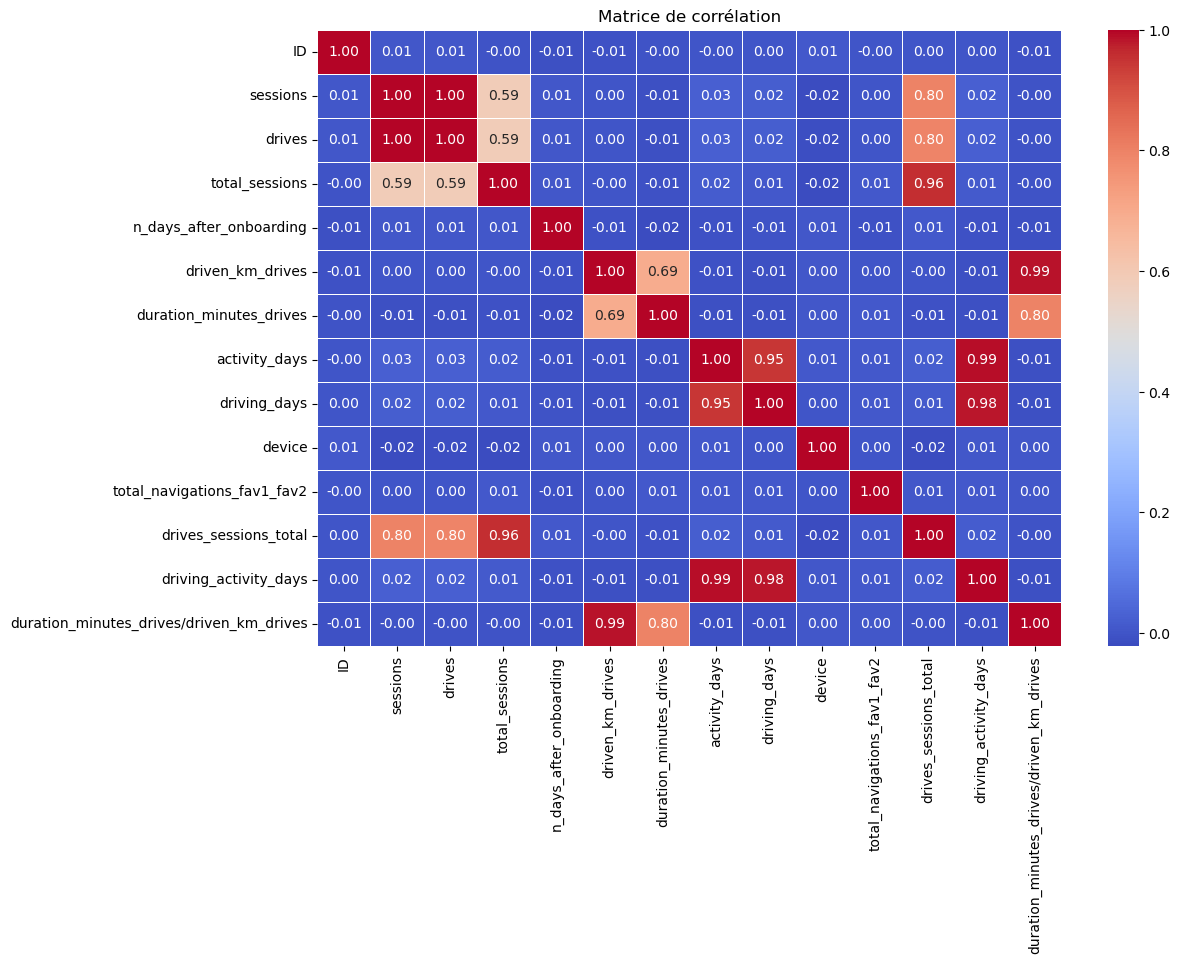

In [155]:
# Calculer la matrice de corrélation
correlation_matrix = data_inbalanced_60.corr()
# Visualisation avec une heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matrice de corrélation")
plt.show()

### suprimer les colonnes (feature selsection)

#### smote

In [156]:
data_smote_60 = data_smote_60.drop(columns=['ID','driving_days', 'activity_days','drives', 'sessions','total_sessions','duration_minutes_drives','driven_km_drives'])
data_smote_90 = data_smote_90.drop(columns=['ID','driving_days', 'activity_days','drives', 'sessions'])

#### random sample

In [157]:
data_random_sample_60 = data_random_sample_60.drop(columns=['ID','driving_days', 'activity_days','drives', 'sessions','total_sessions','duration_minutes_drives','driven_km_drives'])
data_random_sample_90 = data_random_sample_90.drop(columns=['ID','driving_days', 'activity_days','drives', 'sessions'])

#### ADASYN 

In [158]:
data_ADASYN_60 = data_ADASYN_60.drop(columns=['ID','driving_days', 'activity_days','drives', 'sessions','total_sessions','duration_minutes_drives','driven_km_drives'])
data_ADASYN_90 = data_ADASYN_90.drop(columns=['ID','driving_days', 'activity_days','drives', 'sessions'])

#### inbalenced data

In [159]:
data_inbalanced_60 = data_inbalanced_60.drop(columns=['ID','driving_days', 'activity_days','drives', 'sessions','total_sessions','duration_minutes_drives','driven_km_drives'])
data_inbalanced_90 = data_inbalanced_90.drop(columns=['ID','driving_days', 'activity_days','drives', 'sessions'])

In [160]:
data_inbalanced_90

,total_sessions,n_days_after_onboarding,driven_km_drives,duration_minutes_drives,device,total_navigations_fav1_fav2,drives_sessions,driving_activity_days
1096,237.561772,997,3194.222587,2612.093196,0,261,-86.561105,13.234037
1369,49.389484,1680,3328.495156,1845.400612,0,444,-87.824987,-14.735076
8560,78.528902,3056,5309.711961,293.449928,1,269,-83.747189,18.565059
8597,60.701497,1897,3414.279152,1408.089196,1,170,-82.054082,14.333806
5677,97.335112,1847,3318.459487,1788.450512,0,55,-72.980395,-18.209345
...,...,...,...,...,...,...,...,...
6176,610.060341,2396,7730.115672,2164.061227,1,127,56.483491,1.743598
4399,30.435640,94,1799.341831,792.793577,1,15,-95.002850,-18.966329
8811,209.046985,3449,3523.790360,927.692919,0,26,-40.763446,-8.439972
1821,332.759634,1910,5738.296812,662.602634,0,24,5.403794,-8.989857


### standariser les donner

In [161]:
numeric_cols_60 = [i for i in data_inbalanced_60.columns if i != 'label' and i != 'device']
numeric_cols_90 = [i for i in data_inbalanced_90.columns if i != 'label' and i != 'device']

#### inbalanced data

In [162]:
##### data 60 

In [163]:
scaler_inbalanced_60 = StandardScaler()
data_inbalanced_60[numeric_cols_60] = scaler_inbalanced_60.fit_transform(data_inbalanced_60[numeric_cols_60])

In [164]:
#### data_90

In [165]:
scaler_inbalanced_90 = StandardScaler()
data_inbalanced_90[numeric_cols_90] = scaler_inbalanced_90.fit_transform(data_inbalanced_90[numeric_cols_90])

#### smote

In [166]:
#### data_smote_60

In [167]:
scaler_smote_60 = StandardScaler()
data_smote_60[numeric_cols_60] = scaler_smote_60.fit_transform(data_smote_60[numeric_cols_60])

In [168]:
#### data_smote_90

In [169]:
scaler_smote_90 = StandardScaler()
data_smote_90[numeric_cols_90] = scaler_smote_90.fit_transform(data_smote_90[numeric_cols_90])

#### random sampling 

In [170]:
#### random sampling 60

In [171]:
scaler_random_sample_60 = StandardScaler()
data_random_sample_60[numeric_cols_60] = scaler_random_sample_60.fit_transform(data_random_sample_60[numeric_cols_60])

In [172]:
#### random sampling 90

In [173]:
scaler_random_sample_90 = StandardScaler()
data_random_sample_90[numeric_cols_90] = scaler_random_sample_90.fit_transform(data_random_sample_90[numeric_cols_90])

#### ADASYN

In [174]:
#### data ADASYN 60

In [175]:
scaler_ADASYN_60 = StandardScaler()
data_ADASYN_60[numeric_cols_60] = scaler_ADASYN_60.fit_transform(data_ADASYN_60[numeric_cols_60])

In [176]:
#### data ADASYN 90

In [177]:
scaler_ADASYN_90 = StandardScaler()
data_ADASYN_90[numeric_cols_90] = scaler_ADASYN_90.fit_transform(data_ADASYN_90[numeric_cols_90])

In [178]:
data.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,total_navigations_fav1_fav2
count,11439.000000,11439.000000,11439.000000,11439.000000,11439.000000,11439.000000,11439.000000,11439.000000,11439.000000,11439.000000,11439.000000
mean,7501.283329,80.539820,67.145292,190.102945,1754.695253,4052.646493,1864.216947,15.531690,12.191101,0.355625,150.809599
std,4326.177561,80.457854,65.644203,136.663599,1009.487895,2516.675010,1441.996274,8.988463,7.818295,0.478723,154.137010
min,1.000000,0.000000,0.000000,0.220211,4.000000,60.441250,18.282082,0.000000,0.000000,0.000000,0.000000
25%,3760.500000,23.000000,20.000000,90.619522,884.500000,2212.528710,843.839510,8.000000,5.000000,0.000000,38.000000
50%,7494.000000,57.000000,48.000000,160.018840,1748.000000,3507.548927,1482.999530,16.000000,12.000000,0.000000,105.000000
75%,11258.500000,111.000000,93.000000,254.382067,2635.000000,5308.791468,2463.924350,23.000000,19.000000,1.000000,216.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,21183.401890,15851.727160,31.000000,30.000000,1.000000,1267.000000


### matrice de correlation

In [179]:

all_pca_90 = [pca1_smote_90,pca2_smote_90,pca1_random_sample_90,
              pca2_random_sample_90,pca1_ADASYN_90,pca2_ADASYN_90,pca1_inbalanced_90,pca2_inbalanced_90] 
d
all_pca_60 = [pca1_smote_60,pca2_smote_60,pca3_smote_60,pca1_random_sample_60,pca2_random_sample_60,
              pca3_random_sample_60,pca1_ADASYN_60,pca2_ADASYN_60,pca3_ADASYN_60,pca1_inbalanced_60,pca2_inbalanced_60,pca3_inbalanced_60]

all_pca_90_names= [
    'pca1_smote_90', 'pca2_smote_90',
    'pca1_random_sample_90', 'pca2_random_sample_90',
    'pca1_ADASYN_90', 'pca2_ADASYN_90',
    'pca1_inbalanced_90', 'pca2_inbalanced_90'
]

all_pca_60_names = [
    'pca1_smote_60', 'pca2_smote_60', 'pca3_smote_60',
    'pca1_random_sample_60', 'pca2_random_sample_60', 'pca3_random_sample_60',
    'pca1_ADASYN_60', 'pca2_ADASYN_60', 'pca3_ADASYN_60',
    'pca1_inbalanced_60', 'pca2_inbalanced_60', 'pca3_inbalanced_60'
]

all_pca = {}

for name,ensemble in zip(all_pca_90_names,all_pca_90):
    all_pca[name] = ensemble
    
for name,ensemble in zip(all_pca_60_names,all_pca_60):
    all_pca[name] = ensemble

#scalars 
scalers = [
    scaler_inbalanced_60,scaler_smote_60,scaler_random_sample_60,scaler_ADASYN_60,
    scaler_inbalanced_90,scaler_smote_90,scaler_random_sample_90,scaler_ADASYN_90
]
scalers_names = [
    'scaler_inbalanced_60','scaler_smote_60','scaler_random_sample_60','scaler_ADASYN_60',
    'scaler_inbalanced_90','scaler_smote_90','scaler_random_sample_90','scaler_ADASYN_90'
]
all_scalers = {}
for name,ensemble in zip(scalers_names,scalers):
    all_scalers[name] = ensemble



def pretretement(x_test,y_test,feature_engeniring_type,balanced_type):
    xp_test = x_test.copy()
    yp_test = y_test.copy()
    #encodage 
    xp_test['device'] = xp_test['device'].map({'iPhone': 0, 'Android': 1})

   # For 'label' column (e.g. y_train)
    yp_test = yp_test.map({'retained': 1, 'churned': 0})

    #feature engering 
    ##add the two columns fav1 and fva2 taugheter
    xp_test['total_navigations_fav1_fav2'] = xp_test['total_navigations_fav1'] + xp_test['total_navigations_fav2']
    xp_test = xp_test.drop(columns=['total_navigations_fav1','total_navigations_fav2'])

    #pca
    if feature_engeniring_type == 90:
        #pca
        X1 = xp_test[['drives', 'sessions']].values
        X2 = xp_test[['driving_days', 'activity_days']].values

        #1
        X_pca1 = all_pca[f'pca1_{balanced_type}_{feature_engeniring_type}'].transform(X1)
        #2
        X_pca2 = all_pca[f'pca2_{balanced_type}_{feature_engeniring_type}'].transform(X2)

        #
        xp_test['drives_sessions'] = X_pca1
        xp_test['driving_activity_days'] = X_pca2

        #suprimer les colonnes 
        xp_test = xp_test.drop(columns=['ID','driving_days', 'activity_days','drives', 'sessions'])

        #standarisation 
        xp_test[numeric_cols_90] = all_scalers[f'scaler_{balanced_type}_{feature_engeniring_type}'].transform(xp_test[numeric_cols_90])
    
    elif feature_engeniring_type == 60:
                    
        X1 = xp_test[['drives', 'sessions','total_sessions']].values
        X2 = xp_test[['driving_days', 'activity_days']].values
        X3 = xp_test[['duration_minutes_drives','driven_km_drives']]
        
        #1
        X_pca1 = all_pca[f'pca1_{balanced_type}_{feature_engeniring_type}'].transform(X1)
        #2
        X_pca2 = all_pca[f'pca2_{balanced_type}_{feature_engeniring_type}'].transform(X2)
        #3 
        X_pca3 = all_pca[f'pca3_{balanced_type}_{feature_engeniring_type}'].transform(X3)

        #
        xp_test['drives_sessions_total'] = X_pca1
        xp_test['driving_activity_days'] = X_pca2
        xp_test['duration_minutes_drives/driven_km_drives'] = X_pca3

        #sprimer les colonnes
        xp_test = xp_test.drop(columns=['ID','driving_days', 'activity_days','drives', 'sessions','total_sessions','duration_minutes_drives','driven_km_drives'])

        #standarisation 
        xp_test[numeric_cols_60] = all_scalers[f'scaler_{balanced_type}_{feature_engeniring_type}'].transform(xp_test[numeric_cols_60])

    return xp_test,yp_test


# temp

## Modelling

In [180]:
data_ensembles = [[data_inbalanced_60,y_train],
                  [data_inbalanced_90,y_train],
                  [data_random_sample_60,y_random_sample],
                  [data_random_sample_90,y_random_sample],
                  [data_ADASYN_60,y_ADASYN],
                  [data_ADASYN_90,y_ADASYN],
                  [data_smote_60,y_smote],
                  [data_smote_90,y_smote]]


data_names = ['data_inbalanced_60','data_inbalanced_90','data_random_sample_60','data_random_sample_90','data_ADASYN_60','data_ADASYN_90','data_smote_60','data_smote_90']
all_data = {}
for name,ensemble in zip(data_names,data_ensembles):
    all_data[name] = ensemble



### regression logistique

In [181]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


In [182]:

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'] 
}
data_estimators = {}
data_accuracy = {}

for name,ensemble in all_data.items():
    log = LogisticRegression()
    #train the model using the cros validation method
    grid_search = GridSearchCV(estimator=log,param_grid=param_grid, cv=5, scoring='accuracy')
    grid_search.fit(ensemble[0], ensemble[1])
    
    #the the model info into a list
    data_estimators[name] = grid_search.best_estimator_
    data_accuracy[name] = grid_search.best_score_

data_accuracy

{'data_inbalanced_60': 0.8250725061995284,
 'data_inbalanced_90': 0.8261211896979278,
 'data_random_sample_60': 0.6904357066950053,
 'data_random_sample_90': 0.6909139213602551,
 'data_ADASYN_60': 0.7233781785232593,
 'data_ADASYN_90': 0.7246025381318641,
 'data_smote_60': 0.723538788522848,
 'data_smote_90': 0.7247608926673751}

#### all data

C:\Users\info\AppData\Local\Temp\ipykernel_14388\3805481856.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Dataset', y='Accuracy', data=results_df, palette='viridis')


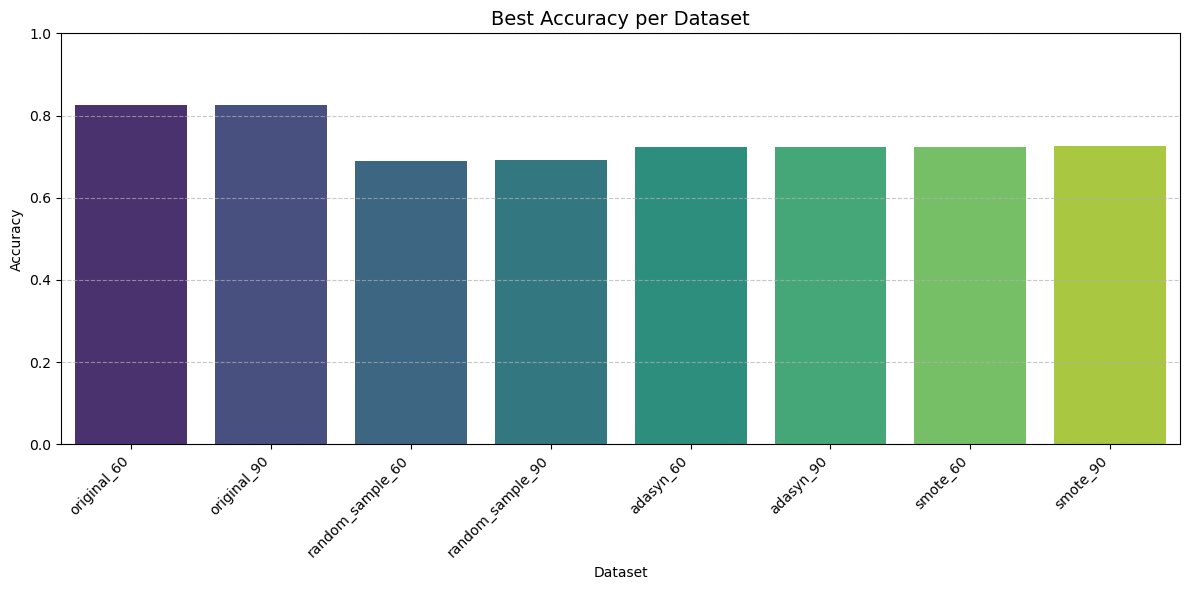

In [183]:
dataset_names = [
    "original_60", "original_90", 
    "random_sample_60", "random_sample_90",
    "adasyn_60", "adasyn_90",
    "smote_60", "smote_90"
]

# Create DataFrame
results_df = pd.DataFrame({
    'Dataset': dataset_names,
    'Accuracy': data_accuracy.values(),
})

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x='Dataset', y='Accuracy', data=results_df, palette='viridis')

plt.title('Best Accuracy per Dataset', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylabel('Accuracy')
plt.xlabel('Dataset')
plt.tight_layout()
plt.show()


In [184]:
### test dataset

In [185]:
all_data_info = {'data_inbalanced_60':['inbalanced',60],
                'data_inbalanced_90' : ['inbalanced',90],
                'data_random_sample_60':['random_sample',60],
                'data_random_sample_90' : ['random_sample',90],
                'data_ADASYN_60':['ADASYN',60],
                'data_ADASYN_90' : ['ADASYN',90],
                'data_smote_60':['smote',60],
                'data_smote_90' : ['smote',90],
                }

In [186]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix,classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [187]:
######test

In [188]:
#test
for name,ensemble in all_data.items():
    xp_test,yp_test = pretretement(x_test,y_test,all_data_info[name][1],all_data_info[name][0])
    y_pred = data_estimators[name].predict(xp_test)

    print()
    print(f'---------------------------------------{name}------------------------------------')
    print()
    print("Accuracy:", accuracy_score(yp_test, y_pred))
    print("Precision:", precision_score(yp_test, y_pred, average='binary'))  # or 'macro', 'micro', etc.
    print("Recall:", recall_score(yp_test, y_pred, average='binary'))
    print("F1 Score:", f1_score(yp_test, y_pred, average='binary'))


---------------------------------------data_inbalanced_60------------------------------------

Accuracy: 0.8227272727272728
Precision: 0.8332129963898917
Recall: 0.9808754781130472
F1 Score: 0.9010345500683193

---------------------------------------data_inbalanced_90------------------------------------

Accuracy: 0.8220279720279721
Precision: 0.8343002175489486
Recall: 0.9779005524861878
F1 Score: 0.9004108784973587

---------------------------------------data_random_sample_60------------------------------------

Accuracy: 0.6653846153846154
Precision: 0.9115566037735849
Recall: 0.657033574160646
F1 Score: 0.7636453445295135

---------------------------------------data_random_sample_90------------------------------------

Accuracy: 0.6629370629370629
Precision: 0.9107037256061502
Recall: 0.6544836379090523
F1 Score: 0.76162215628091

---------------------------------------data_ADASYN_60------------------------------------

Accuracy: 0.6611888111888112
Precision: 0.9004629629629629
Re

In [ ]:
#######test

# trash

#### inbalnced data 60

In [54]:
xp_test,yp_test = pretretement(x_test,y_test,60,'inbalanced')
y_pred = data_estimators['data_inbalanced_60'].predict(xp_test)
    
print("Accuracy:", accuracy_score(yp_test, y_pred))
print("Precision:", precision_score(yp_test, y_pred, average='binary'))  # or 'macro', 'micro', etc.
print("Recall:", recall_score(yp_test, y_pred, average='binary'))
print("F1 Score:", f1_score(yp_test, y_pred, average='binary'))

Accuracy: 0.8223776223776224
Precision: 0.8307637145930441
Recall: 0.9847003824904378
F1 Score: 0.9012057565149747


In [60]:
print(classification_report(yp_test, y_pred))

              precision    recall  f1-score   support

           0       0.31      0.72      0.44       507
           1       0.92      0.66      0.77      2353

    accuracy                           0.67      2860
   macro avg       0.61      0.69      0.60      2860
weighted avg       0.81      0.67      0.71      2860



#### inbalnced data 90

In [57]:
xp_test,yp_test = pretretement(x_test,y_test,90,'inbalanced')
y_pred = data_estimators[1].predict(xp_test)
    
print("Accuracy:", accuracy_score(yp_test, y_pred))
print("Precision:", precision_score(yp_test, y_pred, average='binary'))  # or 'macro', 'micro', etc.
print("Recall:", recall_score(yp_test, y_pred, average='binary'))
print("F1 Score:", f1_score(yp_test, y_pred, average='binary'))

Accuracy: 0.8237762237762237
Precision: 0.8284191829484903
Recall: 0.991075223119422
F1 Score: 0.9024767801857585


In [ ]:
print(classification_report(yp_test, y_pred))

#### random sampling data 60

In [58]:
xp_test,yp_test = pretretement(x_test,y_test,60,'random_sample')
y_pred = data_estimators[2].predict(xp_test)
    
print("Accuracy:", accuracy_score(yp_test, y_pred))
print("Precision:", precision_score(yp_test, y_pred, average='binary'))  # or 'macro', 'micro', etc.
print("Recall:", recall_score(yp_test, y_pred, average='binary'))
print("F1 Score:", f1_score(yp_test, y_pred, average='binary'))

Accuracy: 0.6695804195804196
Precision: 0.9185493460166468
Recall: 0.6566085847853803
F1 Score: 0.7657992565055762


In [ ]:
print(classification_report(yp_test, y_pred))

#### random sampling data 90

In [58]:
xp_test,yp_test = pretretement(x_test,y_test,90,'random_sample')
y_pred = data_estimators['data_random_sample_90'].predict(xp_test)
    
print("Accuracy:", accuracy_score(yp_test, y_pred))
print("Precision:", precision_score(yp_test, y_pred, average='binary'))  # or 'macro', 'micro', etc.
print("Recall:", recall_score(yp_test, y_pred, average='binary'))
print("F1 Score:", f1_score(yp_test, y_pred, average='binary'))

Accuracy: 0.670979020979021
Precision: 0.9157832744405182
Recall: 0.6608584785380366
F1 Score: 0.7677116761293508


In [ ]:
print(classification_report(yp_test, y_pred))

#### ADASYN data 60

In [60]:
xp_test,yp_test = pretretement(x_test,y_test,60,'ADASYN')
y_pred = data_estimators[4].predict(xp_test)
    
print("Accuracy:", accuracy_score(yp_test, y_pred))
print("Precision:", precision_score(yp_test, y_pred, average='binary'))  # or 'macro', 'micro', etc.
print("Recall:", recall_score(yp_test, y_pred, average='binary'))
print("F1 Score:", f1_score(yp_test, y_pred, average='binary'))

Accuracy: 0.6734265734265734
Precision: 0.9033541785105174
Recall: 0.6753081172970675
F1 Score: 0.7728599221789884


In [ ]:
print(classification_report(yp_test, y_pred))

#### ADASYN data 90

In [61]:
xp_test,yp_test = pretretement(x_test,y_test,90,'ADASYN')
y_pred = data_estimators[5].predict(xp_test)
    
print("Accuracy:", accuracy_score(yp_test, y_pred))
print("Precision:", precision_score(yp_test, y_pred, average='binary'))  # or 'macro', 'micro', etc.
print("Recall:", recall_score(yp_test, y_pred, average='binary'))
print("F1 Score:", f1_score(yp_test, y_pred, average='binary'))

Accuracy: 0.6758741258741259
Precision: 0.9051136363636364
Recall: 0.6770080747981301
F1 Score: 0.774617067833698


In [ ]:
print(classification_report(yp_test, y_pred))

#### smote data 60

In [62]:
xp_test,yp_test = pretretement(x_test,y_test,60,'smote')
y_pred = data_estimators[6].predict(xp_test)
    
print("Accuracy:", accuracy_score(yp_test, y_pred))
print("Precision:", precision_score(yp_test, y_pred, average='binary'))  # or 'macro', 'micro', etc.
print("Recall:", recall_score(yp_test, y_pred, average='binary'))
print("F1 Score:", f1_score(yp_test, y_pred, average='binary'))

Accuracy: 0.6818181818181818
Precision: 0.9083191850594228
Recall: 0.6821079473013175
F1 Score: 0.779126213592233


In [ ]:
print(classification_report(yp_test, y_pred))

#### smote data 90

In [63]:
xp_test,yp_test = pretretement(x_test,y_test,90,'smote')
y_pred = data_estimators[7].predict(xp_test)
    
print("Accuracy:", accuracy_score(yp_test, y_pred))
print("Precision:", precision_score(yp_test, y_pred, average='binary'))  
print("Recall:", recall_score(yp_test, y_pred, average='binary'))
print("F1 Score:", f1_score(yp_test, y_pred, average='binary'))

Accuracy: 0.676923076923077
Precision: 0.9048158640226629
Recall: 0.6787080322991925
F1 Score: 0.7756192326372026


In [ ]:
print(classification_report(yp_test, y_pred))

# trash end

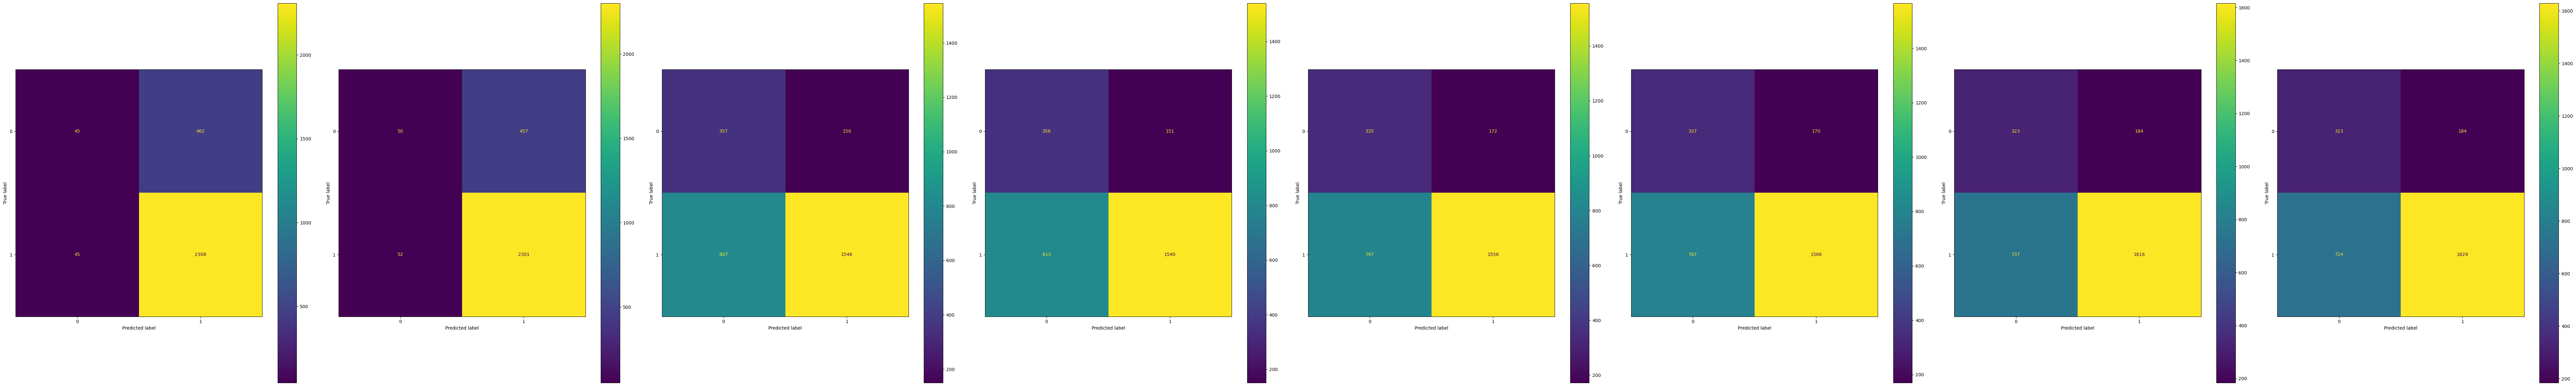

In [193]:

# Prepare plot
n = len(data_estimators)
fig, axes = plt.subplots(1, n, figsize=(10 * n, 12))
i = 0
for name,ensemble in all_data.items():

    xp_test,yp_test = pretretement(x_test,y_test,all_data_info[name][1],all_data_info[name][0])
    y_pred = data_estimators[name].predict(xp_test)

    
    cm = confusion_matrix(yp_test, y_pred)
        
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=axes[i], values_format='d')
    i += 1
plt.tight_layout()
plt.show()


## algorithms 

knn (test data_random_sample_60 ) khalid
svm (test data_random_sample_60 ) sara
naive bayes (test data_random_sample_60 ) ibtissam
random forest  (test data_random_sample_60 and data_60) aymane
dicision tree  (test data_random_sample_60 ) ibtissam
neural network (test data_random_sample_60 )khalid
xgboost (test data_random_sample_60 and data_60) mohamed
Transductive SVM(semi-supervised) mohamed khadma zayda 

# SVM

In [125]:
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.svm import SVC
import optuna 


In [ ]:
##############test

In [ ]:
#####selecting the best kernel for each dataset

In [126]:
def select_best_score(scores):
    maxx = 0
    max_score_name = ''
    for name,acc in scores.items():
        if acc > maxx:
            maxx = acc
            max_score_name = name
    return max_score_name

In [ ]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

model_scores = {}
all_data_kernels = {}

for name,ensemble in all_data.items():
    scores = {}
    for kernel in kernels:
        model_svm = SVC(kernel=kernel)
        score = cross_val_score(model_svm, ensemble[0], ensemble[1], cv=5).mean()
        scores[kernel] = score
    all_data_kernels[name] = select_best_score(scores)

In [ ]:
all_data_kernels

In [ ]:
svm_best_model = {}
svm_accuracy = {}


for name,ensemble in all_data.items():
    def objective(trial):
        #  hyperparameters
        C = trial.suggest_float('C', 1e-3, 1e3,log=True)
        gamma = trial.suggest_float ('gamma', 1e-4, 1e1,log=True)
        kernel = trial.suggest_categorical('kernel', [all_data_kernels[name]])
    
        # Create the SVM model
        model = SVC(C=C, gamma=gamma, kernel=kernel)
    
        # Cross-validation score
        score = cross_val_score(model, ensemble[0], ensemble[1], cv=3, scoring='accuracy').mean()
        return score

    
    optimise = optuna.create_study(direction='maximize')  # We're maximizing accuracy
    optimise.optimize(objective, n_trials=10)

    svm_best_model[name] = SVC(**optimise.best_params)
    svm_best_model[name].fit(ensemble[0], ensemble[1])


In [ ]:
for name,ensemble in svm_best_model.items():
    print(f'parameter {name} best parametre {ensemble..get_params()}')

In [ ]:
#test
for name,ensemble in all_data.items():
    xp_test,yp_test = pretretement(x_test,y_test,all_data_info[name][1],all_data_info[name][0])
    y_pred = svm_best_model[name].predict(xp_test)

    print()
    print(f'---------------------------------------{name}------------------------------------')
    print()
    print("Accuracy:", accuracy_score(yp_test, y_pred))
    print("Precision:", precision_score(yp_test, y_pred, average='binary'))  # or 'macro', 'micro', etc.
    print("Recall:", recall_score(yp_test, y_pred, average='binary'))
    print("F1 Score:", f1_score(yp_test, y_pred, average='binary'))

In [ ]:
############test

# trash

# trash end

# XGboost

In [54]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV


In [ ]:
###### test run all the data points

In [ ]:
# Parameter grid
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.3],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.4, 0.5],
    'reg_lambda': [0, 0.5, 1, 2, 5],
    'reg_alpha': [0, 0.5, 1, 2, 5]
}

xg_boost_models = {}
for name,ensemble in all_data.items():
    # Instantiate base model
    xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

    # Randomized Search CV
    xg_boost_models[name] = RandomizedSearchCV(
        estimator=xgb_clf,
        param_distributions=param_dist,
        n_iter=30,  # Number of parameter settings sampled
        scoring='accuracy',
        cv=5,
        verbose=1,
        random_state=42,
        n_jobs=-1
    )

    # Fit model
    xg_boost_models[name].fit( ensemble[0], ensemble[1])

    # 

In [ ]:
#test 

In [ ]:
#test
for name,ensemble in all_data.items():
    xp_test,yp_test = pretretement(x_test,y_test,all_data_info[name][1],all_data_info[name][0])
    y_pred = xg_boost_models[name].predict(xp_test)

    print()
    print(f'---------------------------------------{name}------------------------------------')
    print()
    print("Accuracy:", accuracy_score(yp_test, y_pred))
    print("Precision:", precision_score(yp_test, y_pred, average='binary'))  # or 'macro', 'micro', etc.
    print("Recall:", recall_score(yp_test, y_pred, average='binary'))
    print("F1 Score:", f1_score(yp_test, y_pred, average='binary'))

In [ ]:
## add confusion matrix


In [ ]:
###### test run all the data points

# trash

# trash end

# random forrest

In [189]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

In [190]:
######test

In [191]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

all_random_forest_model = {}

for name,ensemble in all_data.items():
    rf = RandomForestClassifier(random_state=42)

    all_random_forest_model[name] = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, n_jobs=-1, scoring='accuracy', verbose=1)

    all_random_forest_model[name].fit(ensemble[0], ensemble[1])
    

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Fitting 5 folds for each of 81 candidates, totalling 405 fits


In [195]:
#test 
for name,ensemble in all_data.items():
    xp_test,yp_test = pretretement(x_test,y_test,all_data_info[name][1],all_data_info[name][0])
    y_pred = all_random_forest_model[name].predict(xp_test)

    print()
    print(f'---------------------------------------{name}------------------------------------')
    print()
    print("Accuracy:", accuracy_score(yp_test, y_pred))
    print("Precision:", precision_score(yp_test, y_pred, average='binary'))  # or 'macro', 'micro', etc.
    print("Recall:", recall_score(yp_test, y_pred, average='binary'))
    print("F1 Score:", f1_score(yp_test, y_pred, average='binary'))



---------------------------------------data_inbalanced_60------------------------------------

Accuracy: 0.8195804195804196
Precision: 0.8305145735876215
Recall: 0.9808754781130472
F1 Score: 0.8994544037412315

---------------------------------------data_inbalanced_90------------------------------------

Accuracy: 0.8192307692307692
Precision: 0.8285612025769507
Recall: 0.9838504037399065
F1 Score: 0.8995531377501457

---------------------------------------data_random_sample_60------------------------------------

Accuracy: 0.7944055944055944
Precision: 0.846214201647705
Recall: 0.9167020824479388
F1 Score: 0.8800489596083231

---------------------------------------data_random_sample_90------------------------------------

Accuracy: 0.8083916083916084
Precision: 0.8475163650365807
Recall: 0.935401614959626
F1 Score: 0.8892929292929292

---------------------------------------data_ADASYN_60------------------------------------

Accuracy: 0.6916083916083916
Precision: 0.8804966373512675
R

In [196]:
for name,ensemble in all_data.items():
    xp_test,yp_test = pretretement(x_test,y_test,all_data_info[name][1],all_data_info[name][0])
    y_pred = all_random_forest_model[name].predict(xp_test)
    
    print()
    print(f'---------------------------------------{name}------------------------------------')
    print(classification_report(yp_test, y_pred))


---------------------------------------data_inbalanced_60------------------------------------
              precision    recall  f1-score   support

           0       0.31      0.48      0.38       507
           1       0.87      0.77      0.82      2353

    accuracy                           0.72      2860
   macro avg       0.59      0.62      0.60      2860
weighted avg       0.77      0.72      0.74      2860


---------------------------------------data_inbalanced_90------------------------------------
              precision    recall  f1-score   support

           0       0.31      0.48      0.38       507
           1       0.87      0.77      0.82      2353

    accuracy                           0.72      2860
   macro avg       0.59      0.62      0.60      2860
weighted avg       0.77      0.72      0.74      2860


---------------------------------------data_random_sample_60------------------------------------
              precision    recall  f1-score   support

   

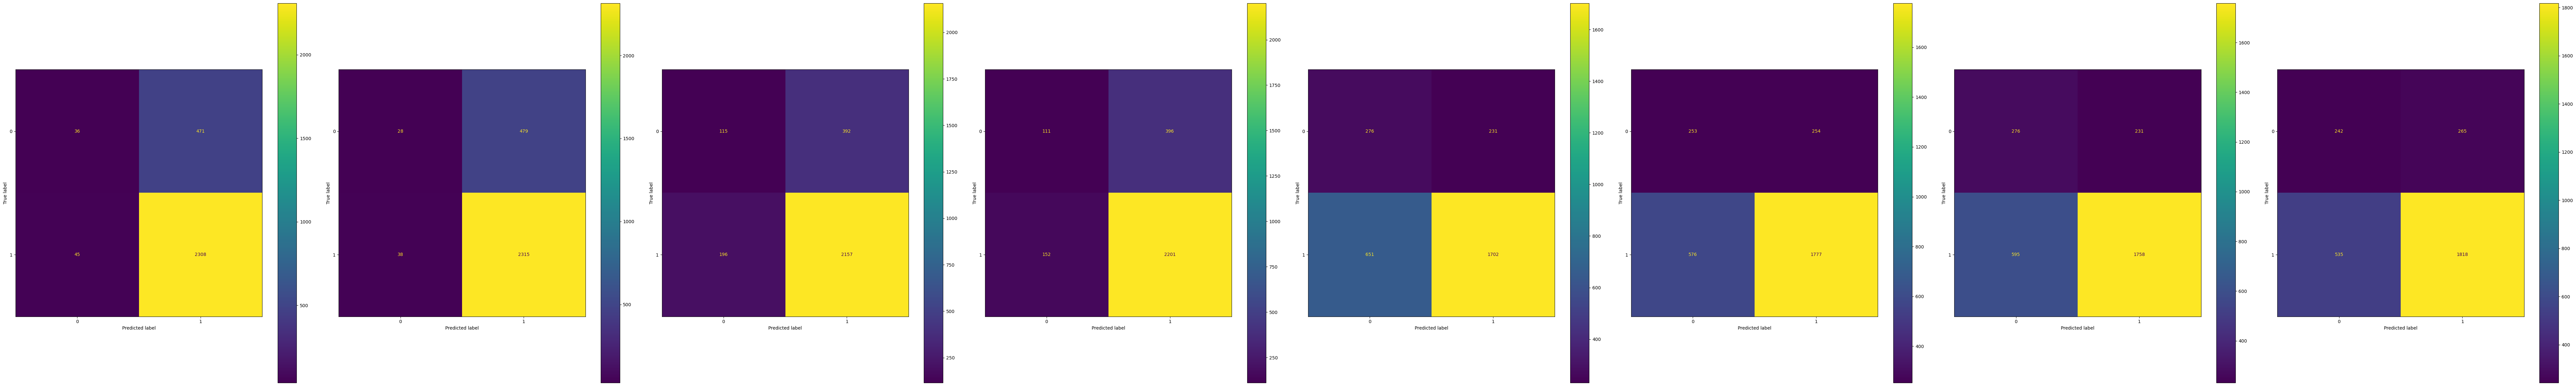

In [194]:

# Prepare plot
n = len(data_estimators)
fig, axes = plt.subplots(1, n, figsize=(10 * n, 12))
i = 0
for name,ensemble in all_data.items():

    xp_test,yp_test = pretretement(x_test,y_test,all_data_info[name][1],all_data_info[name][0])
    y_pred = all_random_forest_model[name].predict(xp_test)

    
    cm = confusion_matrix(yp_test, y_pred)
        
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=axes[i], values_format='d')
    i += 1
plt.tight_layout()
plt.show()


In [ ]:
#### test

# trash

# trash end

# KNN 

In [197]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

In [198]:
########test

In [199]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11]
}
all_knn_model = {}

for name,ensemble in all_data.items():
    knn = KNeighborsClassifier()
    all_knn_model[name] = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy')
    all_knn_model[name].fit(ensemble[0], ensemble[1])

In [200]:
#test
#test 
for name,ensemble in all_data.items():
    xp_test,yp_test = pretretement(x_test,y_test,all_data_info[name][1],all_data_info[name][0])
    y_pred = all_knn_model[name].predict(xp_test)

    print()
    print(f'---------------------------------------{name}------------------------------------')
    print()
    print("Accuracy:", accuracy_score(yp_test, y_pred))
    print("Precision:", precision_score(yp_test, y_pred, average='binary'))  # or 'macro', 'micro', etc.
    print("Recall:", recall_score(yp_test, y_pred, average='binary'))
    print("F1 Score:", f1_score(yp_test, y_pred, average='binary'))


---------------------------------------data_inbalanced_60------------------------------------

Accuracy: 0.8101398601398602
Precision: 0.8317448680351907
Recall: 0.964300892477688
F1 Score: 0.8931312733713835

---------------------------------------data_inbalanced_90------------------------------------

Accuracy: 0.8132867132867133
Precision: 0.8325411334552102
Recall: 0.967700807479813
F1 Score: 0.8950471698113207

---------------------------------------data_random_sample_60------------------------------------

Accuracy: 0.6741258741258741
Precision: 0.8554277138569285
Recall: 0.7267318317042074
F1 Score: 0.7858455882352942

---------------------------------------data_random_sample_90------------------------------------

Accuracy: 0.6867132867132867
Precision: 0.8681152097018696
Recall: 0.7301317467063323
F1 Score: 0.7931671283471837

---------------------------------------data_ADASYN_60------------------------------------

Accuracy: 0.6342657342657343
Precision: 0.8832844574780059
R

In [201]:
for name,ensemble in all_data.items():


    print()
    print(f'---------------------------------------{name}------------------------------------')
    print()
    print(classification_report(yp_test, y_pred))


---------------------------------------data_inbalanced_60------------------------------------

              precision    recall  f1-score   support

           0       0.28      0.58      0.38       507
           1       0.88      0.68      0.77      2353

    accuracy                           0.66      2860
   macro avg       0.58      0.63      0.57      2860
weighted avg       0.77      0.66      0.70      2860


---------------------------------------data_inbalanced_90------------------------------------

              precision    recall  f1-score   support

           0       0.28      0.58      0.38       507
           1       0.88      0.68      0.77      2353

    accuracy                           0.66      2860
   macro avg       0.58      0.63      0.57      2860
weighted avg       0.77      0.66      0.70      2860


---------------------------------------data_random_sample_60------------------------------------

              precision    recall  f1-score   support



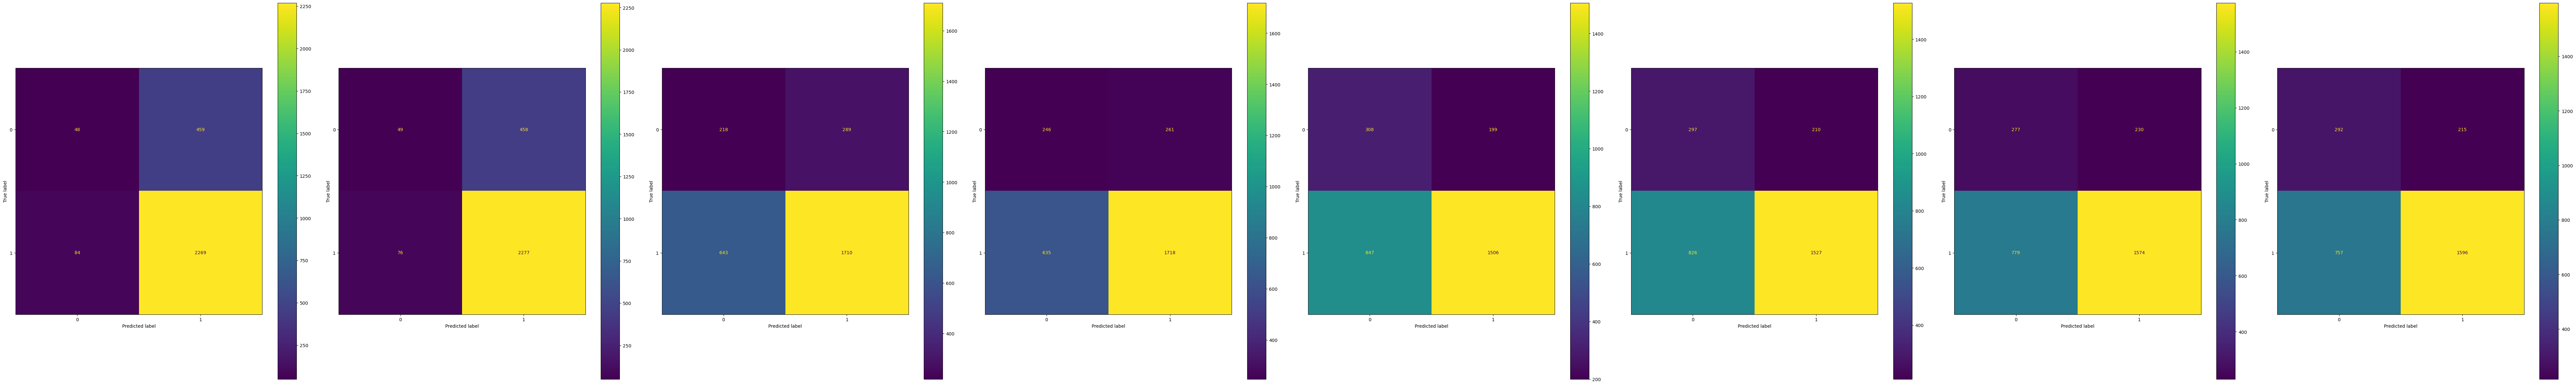

In [202]:
# Prepare plot
n = len(data_estimators)
fig, axes = plt.subplots(1, n, figsize=(10 * n, 12))
i = 0
for name,ensemble in all_data.items():

    xp_test,yp_test = pretretement(x_test,y_test,all_data_info[name][1],all_data_info[name][0])
    y_pred = all_knn_model[name].predict(xp_test)

    
    cm = confusion_matrix(yp_test, y_pred)
        
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=axes[i], values_format='d')
    i += 1
plt.tight_layout()
plt.show()


# trash

# naive bayes

In [203]:
from sklearn.naive_bayes import GaussianNB

In [204]:
models_naive_bayes = {}
for name,ensemble in all_data.items():
    # Train Naive Bayes
    models_naive_bayes[name] = GaussianNB()
    models_naive_bayes[name].fit(ensemble[0], ensemble[1])




In [205]:
#test 
for name,ensemble in all_data.items():
    xp_test,yp_test = pretretement(x_test,y_test,all_data_info[name][1],all_data_info[name][0])
    y_pred = all_random_forest_model[name].predict(xp_test)

    print()
    print(f'---------------------------------------{name}------------------------------------')
    print()
    print("Accuracy:", accuracy_score(yp_test, y_pred))
    print("Precision:", precision_score(yp_test, y_pred, average='binary'))  # or 'macro', 'micro', etc.
    print("Recall:", recall_score(yp_test, y_pred, average='binary'))
    print("F1 Score:", f1_score(yp_test, y_pred, average='binary'))


---------------------------------------data_inbalanced_60------------------------------------

Accuracy: 0.8195804195804196
Precision: 0.8305145735876215
Recall: 0.9808754781130472
F1 Score: 0.8994544037412315

---------------------------------------data_inbalanced_90------------------------------------

Accuracy: 0.8192307692307692
Precision: 0.8285612025769507
Recall: 0.9838504037399065
F1 Score: 0.8995531377501457

---------------------------------------data_random_sample_60------------------------------------

Accuracy: 0.7944055944055944
Precision: 0.846214201647705
Recall: 0.9167020824479388
F1 Score: 0.8800489596083231

---------------------------------------data_random_sample_90------------------------------------

Accuracy: 0.8083916083916084
Precision: 0.8475163650365807
Recall: 0.935401614959626
F1 Score: 0.8892929292929292

---------------------------------------data_ADASYN_60------------------------------------

Accuracy: 0.6916083916083916
Precision: 0.8804966373512675
R

# optimising the best model (feature selection and unsupervised learning)

## get the feauture importance if the best model is in random forrest or logistic regression

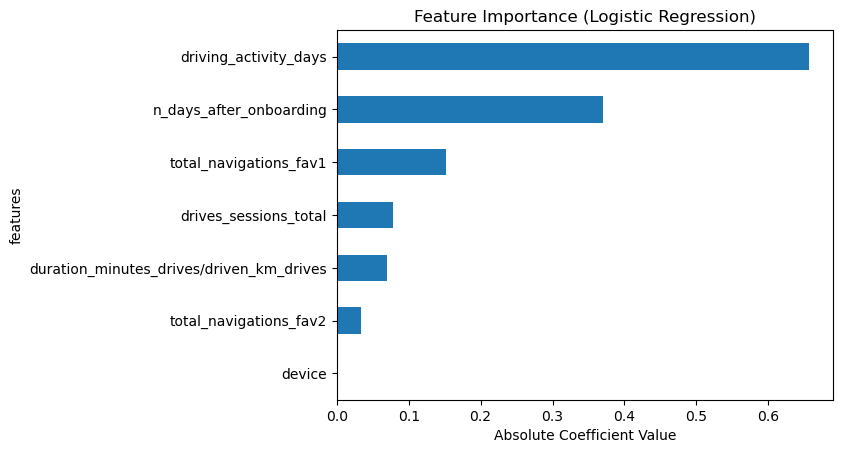

In [69]:
column_name = data_60.columns

coefition = data_estimators[0].coef_[0]

feature_importance = pd.DataFrame({
    'features' : column_name,
    'importance' : coefition,
    'Abs_Coefficient': np.abs(coefition)
})
feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

feature_importance.plot(kind='barh', x='features', y='Abs_Coefficient', legend=False)
plt.title("Feature Importance (Logistic Regression)")
plt.xlabel("Absolute Coefficient Value")
plt.gca().invert_yaxis()
plt.show()

In [ ]:
importance_df.plot(kind='barh', x='Feature', y='Abs_Coefficient', legend=False)
plt.title("Feature Importance (Logistic Regression)")
plt.xlabel("Absolute Coefficient Value")
plt.gca().invert_yaxis()
plt.show()

In [71]:
#train the model with the new varibles
important_feature = []
data_60 = data_60.drop(columns=['device','total_navigations_fav2'])

log = LogisticRegression()
#train the model using the cros validation method
grid_search = GridSearchCV(estimator=log,param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(data_60,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             scoring='accuracy')

In [72]:
#compare the models 

In [83]:
xp_test,yp_test = pretretement(x_test,y_test,60,'inbalenced')
xp_test = xp_test.drop(columns=['device','total_navigations_fav2']).copy()

y_pred = grid_search.best_estimator_.predict(xp_test)
    
print("Accuracy:", accuracy_score(yp_test, y_pred))
print("Precision:", precision_score(yp_test, y_pred, average='binary'))  # or 'macro', 'micro', etc.
print("Recall:", recall_score(yp_test, y_pred, average='binary'))
print("F1 Score:", f1_score(yp_test, y_pred, average='binary'))

Accuracy: 0.8283216783216784
Precision: 0.8336917562724014
Recall: 0.9885252868678283
F1 Score: 0.9045304297102859


# predict the null values and add the values with more than 90 percent and retrain the model and compare the models

In [ ]:
n_predict = pretretement(n_predict)

probas = model_fill_na.predict_proba(n_predict)

print("data shape before: ",data.shape)

for i in range(n_predict.shape[0]):
    proba = probas[i]
    if proba[0] >= 0.85:
        data = pd.concat([data,n_predict.iloc[i]],ignore_index=True)
        churnd = pd.DataFrame({'label':[0]})
        y_train = pd.concat([y_train,churnd],ignore_index=True)
    elif proba[1] >= 0.85:
        data = pd.concat([data,n_predict.iloc[i]],ignore_index=True)
        retaind = pd.DataFrame({'label':[1]})
        y_train = pd.concat([y_train,retaind],ignore_index=True)

print("data shape after: ",data.shape)